https://www.kaggle.com/datasets/syuzai/perth-house-prices

 **Previsão de Preços de Casas em Perth Austrália**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style="darkgrid")


In [ ]:
dados = pd.read_csv('/content/all_perth_310121.csv')
dados.head()

ADDRESS      SUBURB   PRICE  BEDROOMS  BATHROOMS  GARAGE  \
0    1 Acorn Place  South Lake  565000         4          2     2.0   
1      1 Addis Way       Wandi  365000         3          2     2.0   
2  1 Ainsley Court     Camillo  287000         3          1     1.0   
3  1 Albert Street    Bellevue  255000         2          1     2.0   
4     1 Aman Place   Lockridge  325000         4          1     2.0   

   LAND_AREA  FLOOR_AREA  BUILD_YEAR  CBD_DIST               NEAREST_STN  \
0        600         160      2003.0     18300  Cockburn Central Station   
1        351         139      2013.0     26900           Kwinana Station   
2        719          86      1979.0     22600           Challis Station   
3        651          59      1953.0     17900           Midland Station   
4        466         131      1998.0     11200        Bassendean Station   

   NEAREST_STN_DIST  DATE_SOLD  POSTCODE   LATITUDE   LONGITUDE  \
0              1800  09-2018\r      6164 -32.115900  115.842450   
1              4900  02-2019\r      6167 -32.193470  115.859554   
2              1900  06-2015\r      6111 -32.120578  115.993579   
3              3600  07-2018\r      6056 -31.900547  116.038009   
4              2000  11-2016\r      6054 -31.885790  115.947780   

                    NEAREST_SCH  NEAREST_SCH_DIST  NEAREST_SCH_RANK  
0   LAKELAND SENIOR HIGH SCHOOL          0.828339               NaN  
1                ATWELL COLLEGE          5.524324             129.0  
2  KELMSCOTT SENIOR HIGH SCHOOL          1.649178             113.0  
3  SWAN VIEW SENIOR HIGH SCHOOL          1.571401               NaN  
4                 KIARA COLLEGE          1.514922               NaN

In [ ]:
dados.describe()

PRICE      BEDROOMS     BATHROOMS        GARAGE      LAND_AREA  \
count  3.365600e+04  33656.000000  33656.000000  31178.000000   33656.000000   
mean   6.370720e+05      3.659110      1.823063      2.199917    2740.644016   
std    3.558256e+05      0.752038      0.587427      1.365225   16693.513215   
min    5.100000e+04      1.000000      1.000000      1.000000      61.000000   
25%    4.100000e+05      3.000000      1.000000      2.000000     503.000000   
50%    5.355000e+05      4.000000      2.000000      2.000000     682.000000   
75%    7.600000e+05      4.000000      2.000000      2.000000     838.000000   
max    2.440000e+06     10.000000     16.000000     99.000000  999999.000000   

         FLOOR_AREA    BUILD_YEAR      CBD_DIST  NEAREST_STN_DIST  \
count  33656.000000  30501.000000  33656.000000      33656.000000   
mean     183.501545   1989.706436  19777.374465       4523.371494   
std       72.102982     20.964330  11364.415413       4495.064024   
min        1.000000   1868.000000    681.000000         46.000000   
25%      130.000000   1978.000000  11200.000000       1800.000000   
50%      172.000000   1995.000000  17500.000000       3200.000000   
75%      222.250000   2005.000000  26600.000000       5300.000000   
max      870.000000   2017.000000  59800.000000      35500.000000   

           POSTCODE      LATITUDE     LONGITUDE  NEAREST_SCH_DIST  \
count  33656.000000  33656.000000  33656.000000      33656.000000   
mean    6089.420074    -31.960664    115.879265          1.815268   
std       62.167921      0.177780      0.118137          1.746000   
min     6003.000000    -32.472979    115.582730          0.070912   
25%     6050.000000    -32.068437    115.789763          0.880568   
50%     6069.000000    -31.933231    115.854198          1.345520   
75%     6150.000000    -31.843818    115.970722          2.097225   
max     6558.000000    -31.457450    116.343201         23.254372   

       NEAREST_SCH_RANK  
count      22704.000000  
mean          72.672569  
std           40.639795  
min            1.000000  
25%           39.000000  
50%           68.000000  
75%          105.000000  
max          139.000000

# Análises iniciais

In [ ]:
dados.shape

(33656, 19)

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33656 entries, 0 to 33655
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ADDRESS           33656 non-null  object 
 1   SUBURB            33656 non-null  object 
 2   PRICE             33656 non-null  int64  
 3   BEDROOMS          33656 non-null  int64  
 4   BATHROOMS         33656 non-null  int64  
 5   GARAGE            31178 non-null  float64
 6   LAND_AREA         33656 non-null  int64  
 7   FLOOR_AREA        33656 non-null  int64  
 8   BUILD_YEAR        30501 non-null  float64
 9   CBD_DIST          33656 non-null  int64  
 10  NEAREST_STN       33656 non-null  object 
 11  NEAREST_STN_DIST  33656 non-null  int64  
 12  DATE_SOLD         33656 non-null  object 
 13  POSTCODE          33656 non-null  int64  
 14  LATITUDE          33656 non-null  float64
 15  LONGITUDE         33656 non-null  float64
 16  NEAREST_SCH       33656 non-null  object

In [ ]:
#Verifica se ha linhas duplicadas
dados.duplicated().sum()

0

In [ ]:
dados.POSTCODE.nunique()

114

In [ ]:
dados.NEAREST_SCH.nunique()

160

In [ ]:
dados.NEAREST_STN.nunique()

68

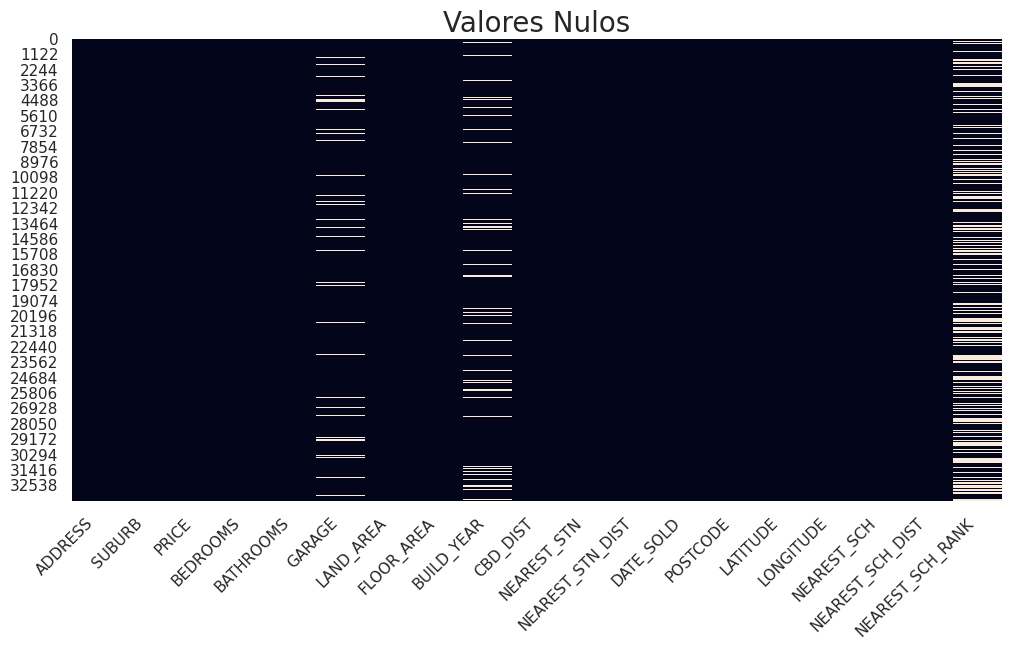

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(data=dados.isnull(), cbar=False)
plt.title("Valores Nulos",fontsize=20)
plt.xticks(ha="right",rotation=45);


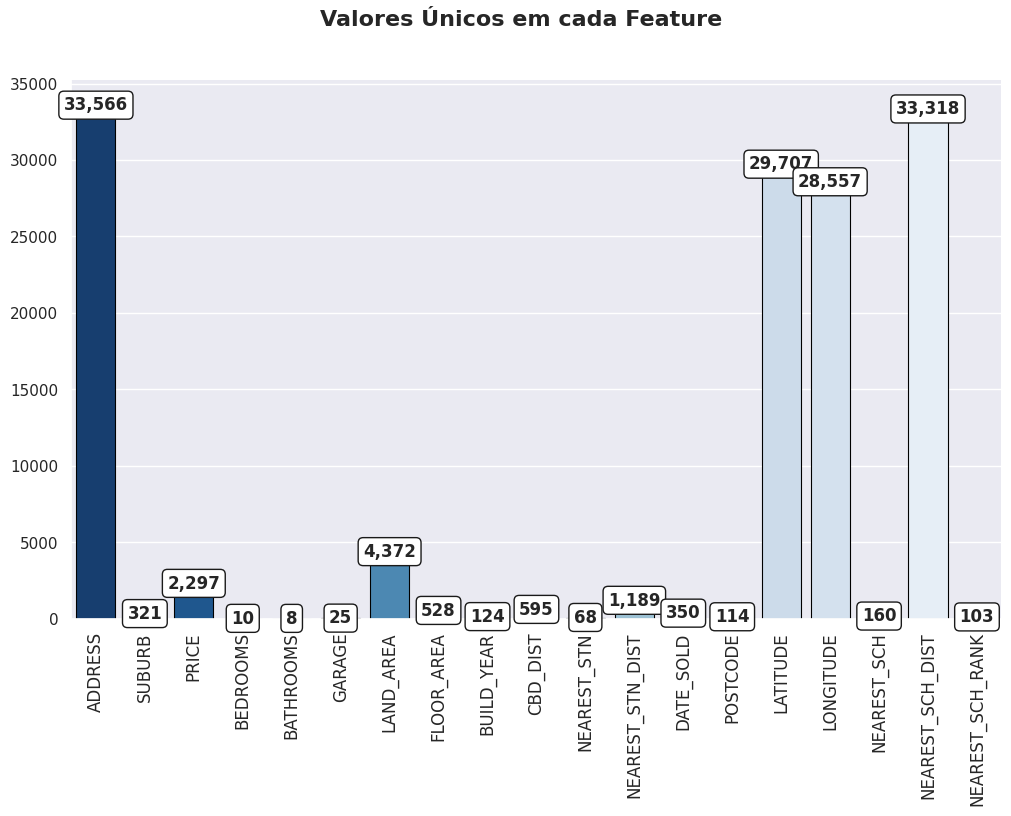

In [ ]:
plt.figure(figsize=(12,7))
ax = sns.barplot(x=dados.columns, y=dados.nunique().values, 
            palette='Blues_r', linewidth=0.8, edgecolor='black')
plt.xticks(rotation=90, fontsize=12)

for p in ax.patches:
    value = f"{p.get_height():,.0f}"
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 20
    ax.text(x, y, value, fontsize=12, ha='center', va='center', weight='bold',
           bbox=dict(facecolor='white', boxstyle='round', linewidth=1, edgecolor='k'))
plt.suptitle(t = 'Valores Únicos em cada Feature', fontsize = 16, weight = 'bold') 
sns.despine()
plt.show()

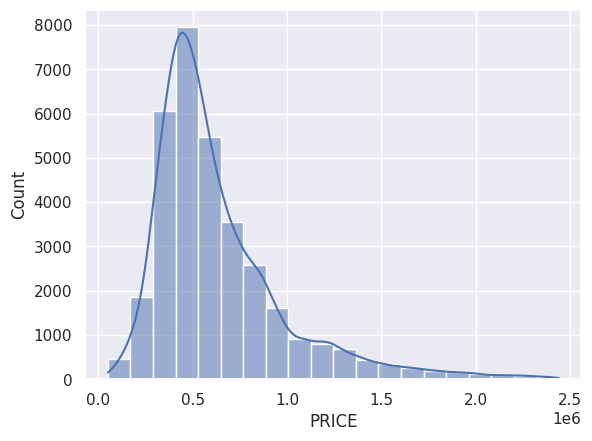

In [ ]:
sns.histplot(data =dados , x="PRICE", bins = 20, kde = True);

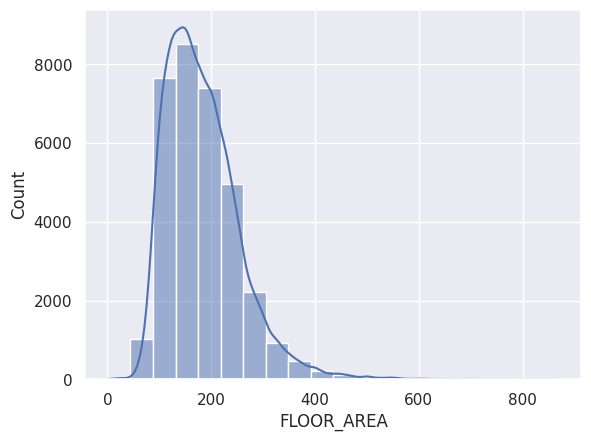

In [ ]:
sns.histplot(data=dados, x="FLOOR_AREA", bins = 20, kde = True);

In [ ]:
columns = dados.drop(["SUBURB" ,"ADDRESS", "POSTCODE", "NEAREST_SCH_RANK", "DATE_SOLD", "NEAREST_STN", "NEAREST_SCH", "BUILD_YEAR"], axis=1)

columns.shape

(33656, 11)

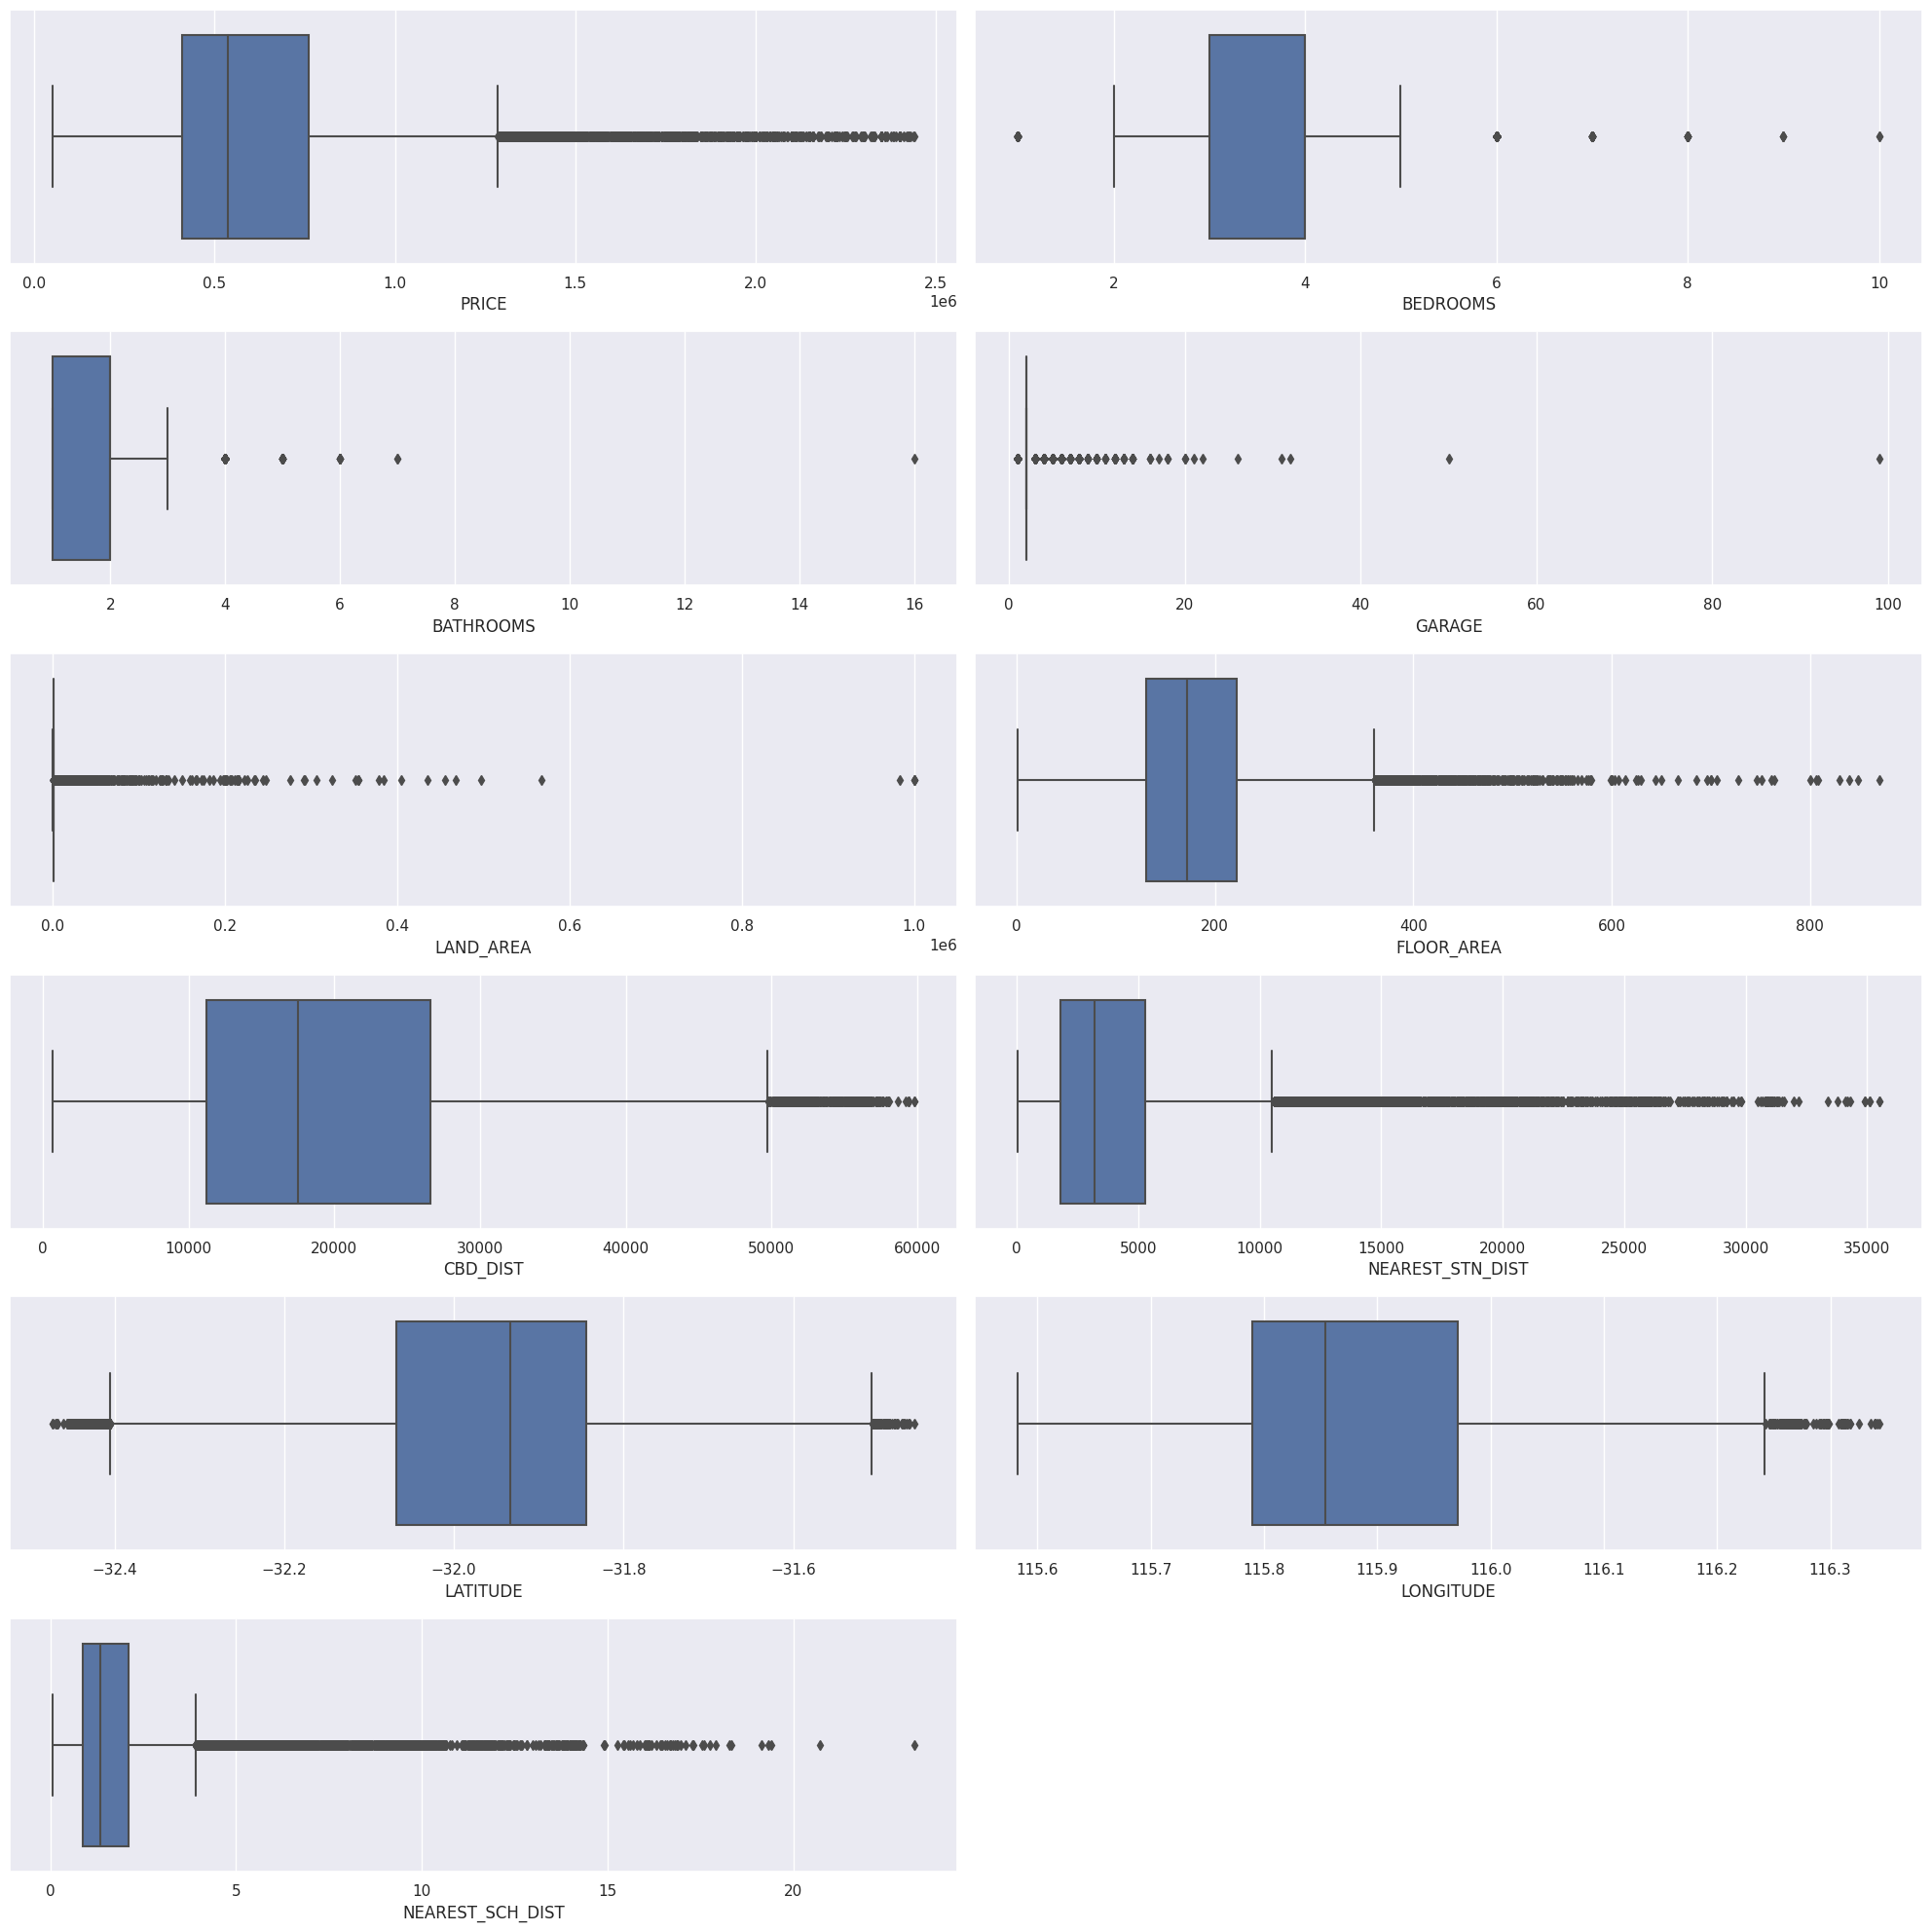

In [ ]:
plt.figure(figsize=(20,20))
for x,y in enumerate(columns):
  plt.subplot(6,2,x+1)
  sns.boxplot(data=dados, x=y)
plt.tight_layout();

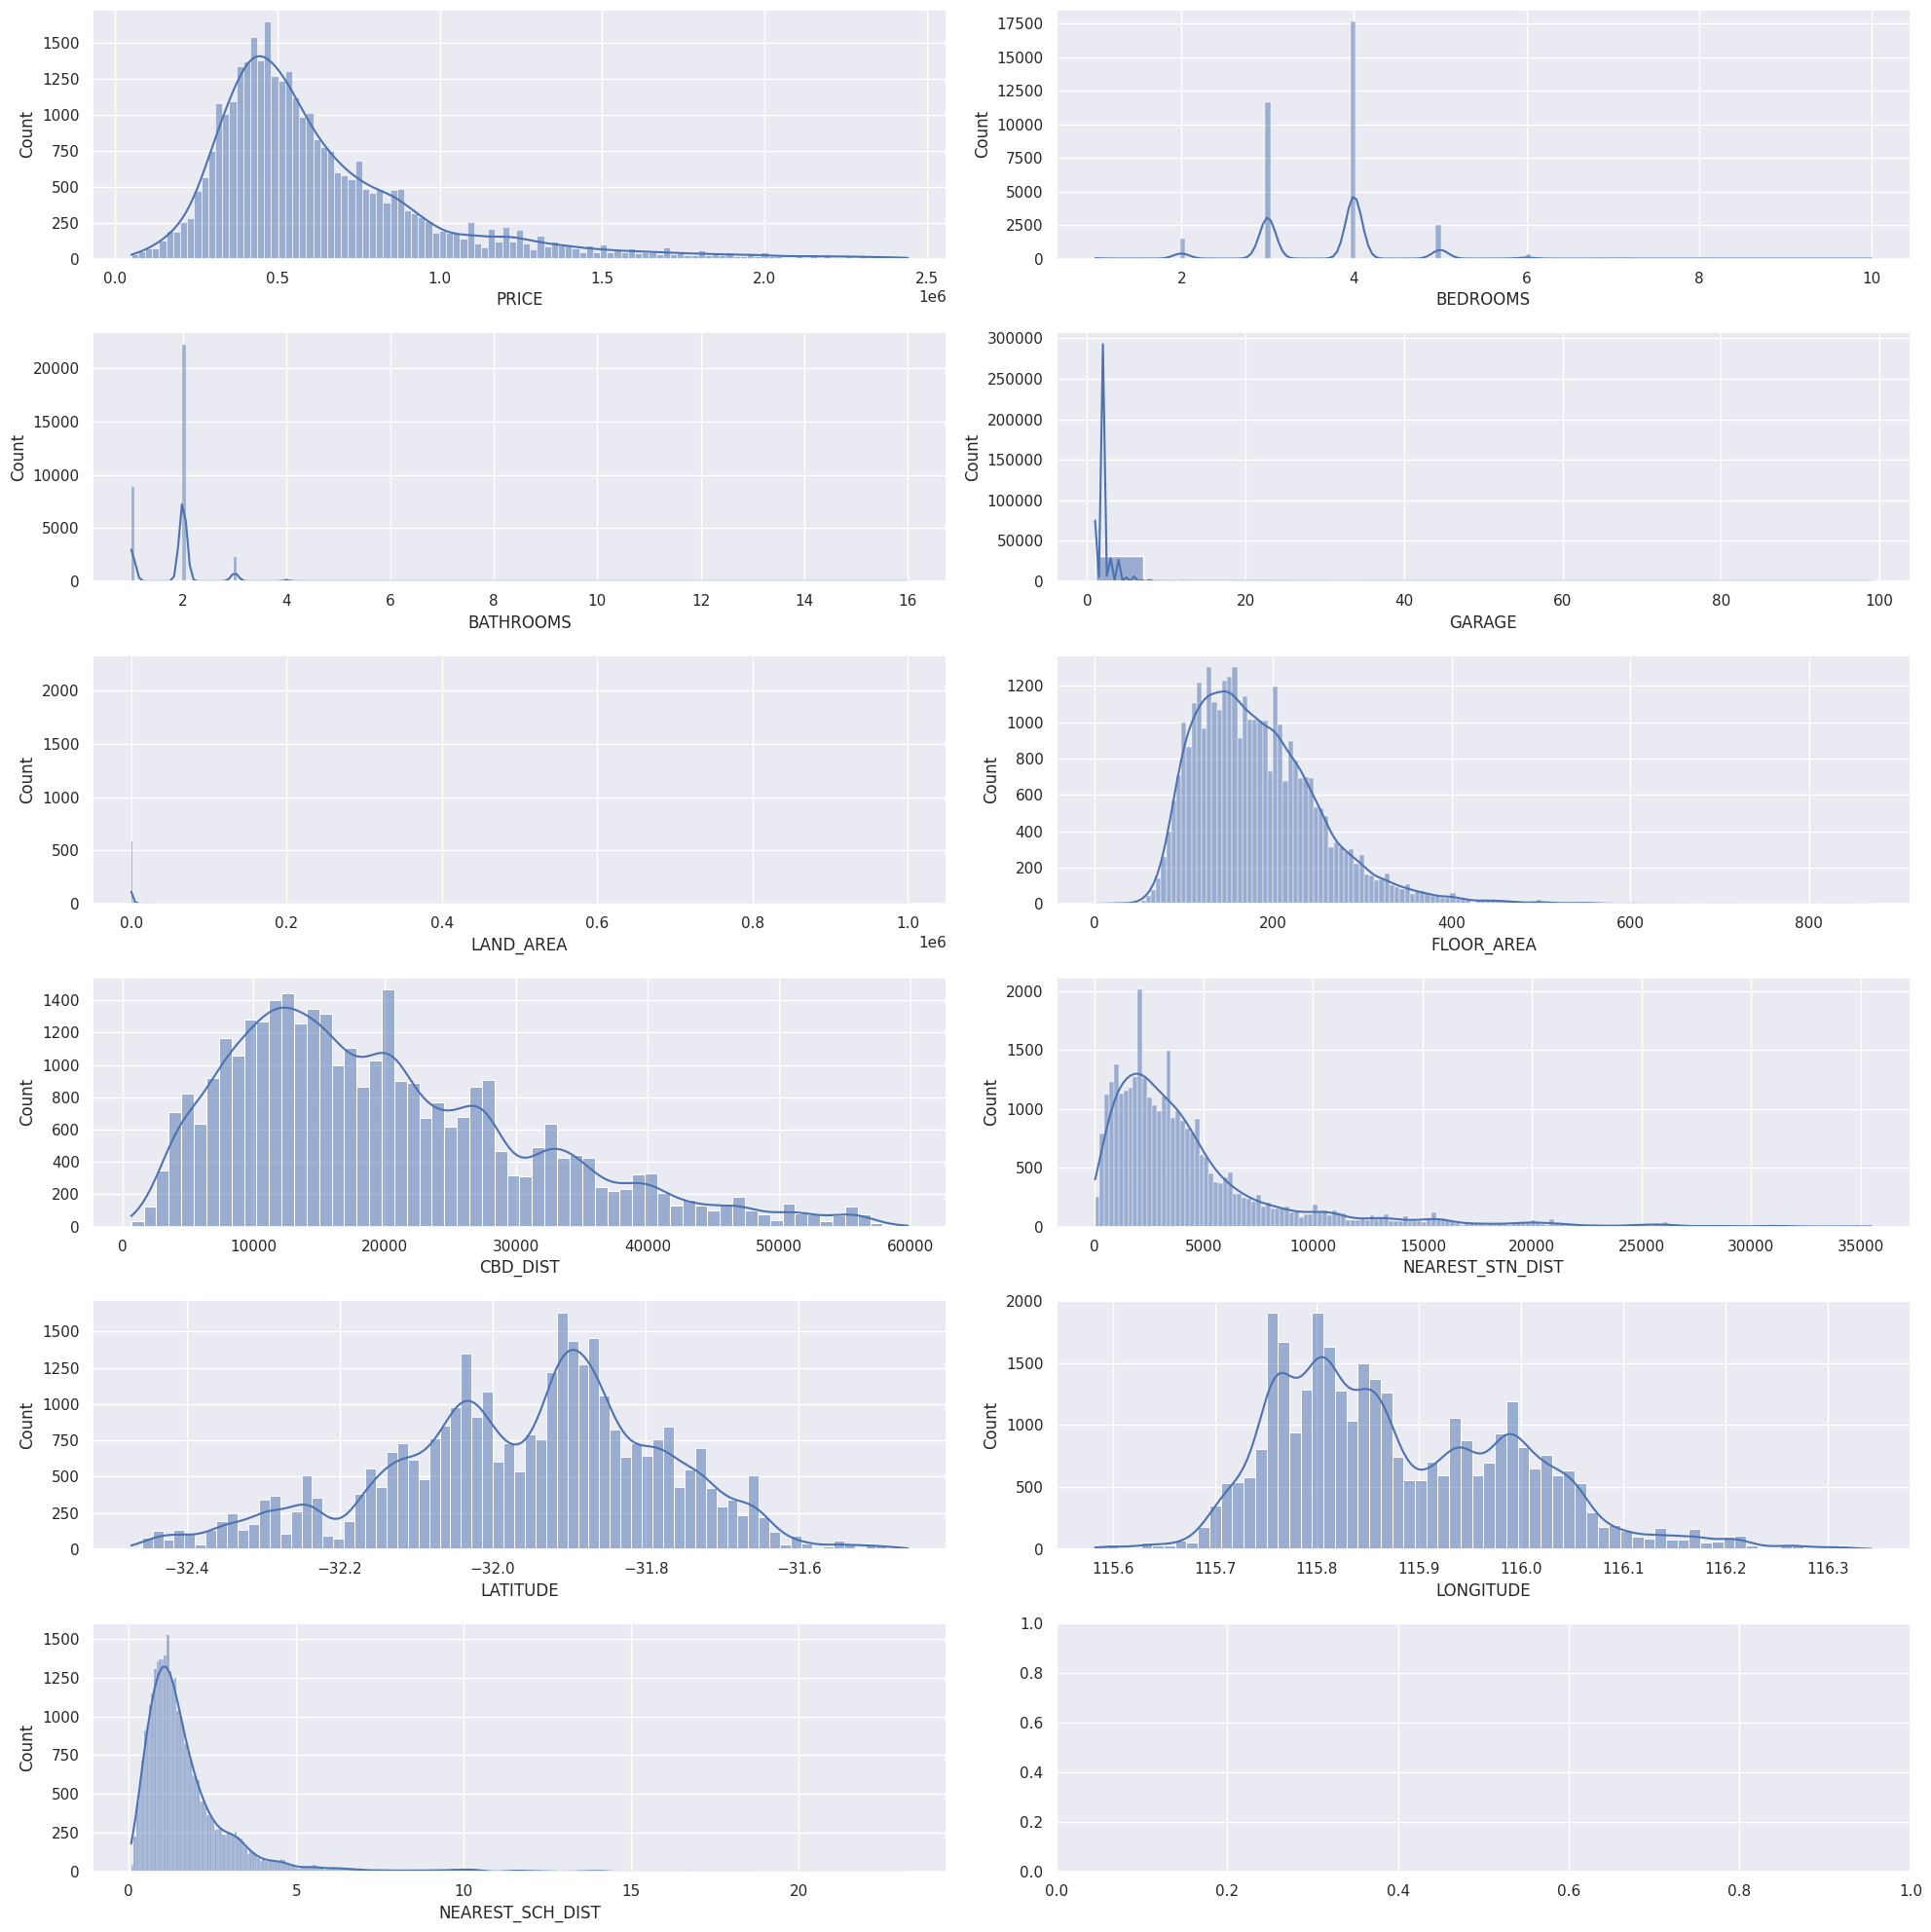

In [ ]:
# Gráfico Histograma
var = dados.columns
var = dados.drop(["SUBURB" ,"ADDRESS", "POSTCODE", "NEAREST_SCH_RANK", "DATE_SOLD", "NEAREST_STN", "NEAREST_SCH", "BUILD_YEAR"], axis=1)

fig, ax = plt.subplots(ncols = 2,nrows = 6, figsize=(20,20))
index = 0
ax = ax.flatten()

for col in var:
    sns.histplot(x=col, data = dados,  ax=ax[index], kde=True )
    index +=1
plt.tight_layout();

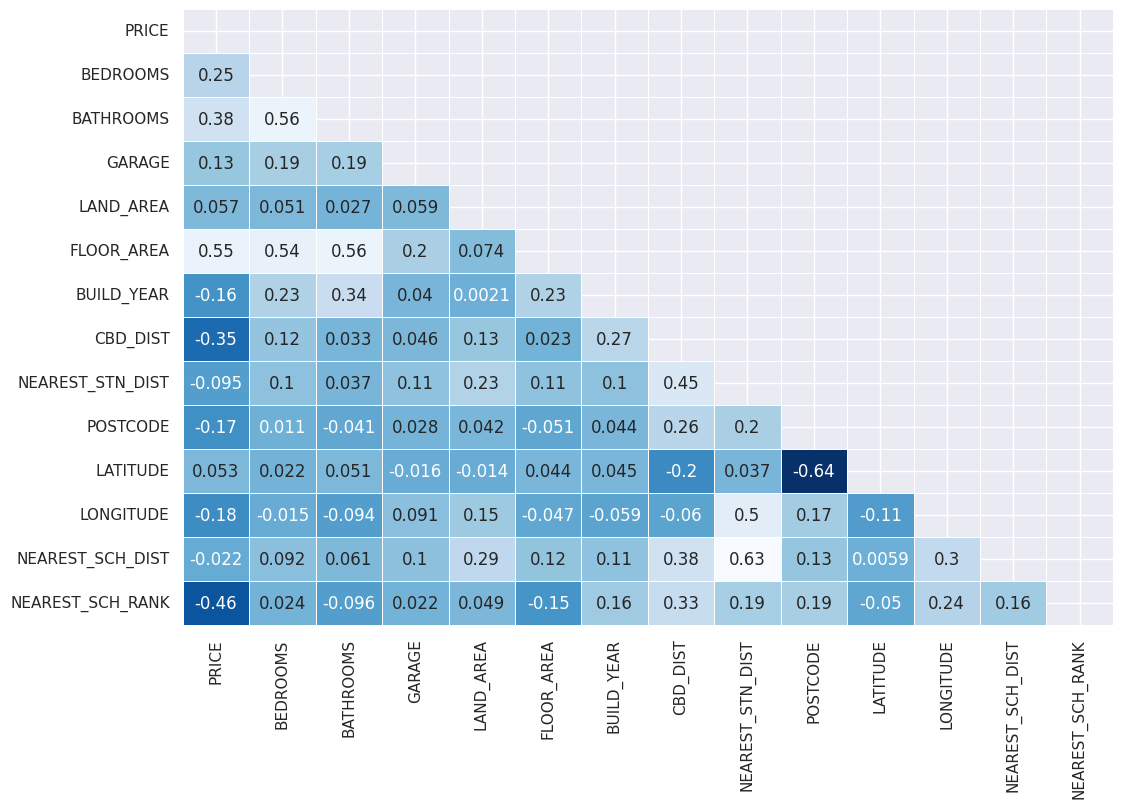

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(dados.corr(),  cbar=False, mask=np.triu(dados.corr()), annot=True,linewidth=0.7, linecolor='white', cmap = 'Blues_r');

# Analytics

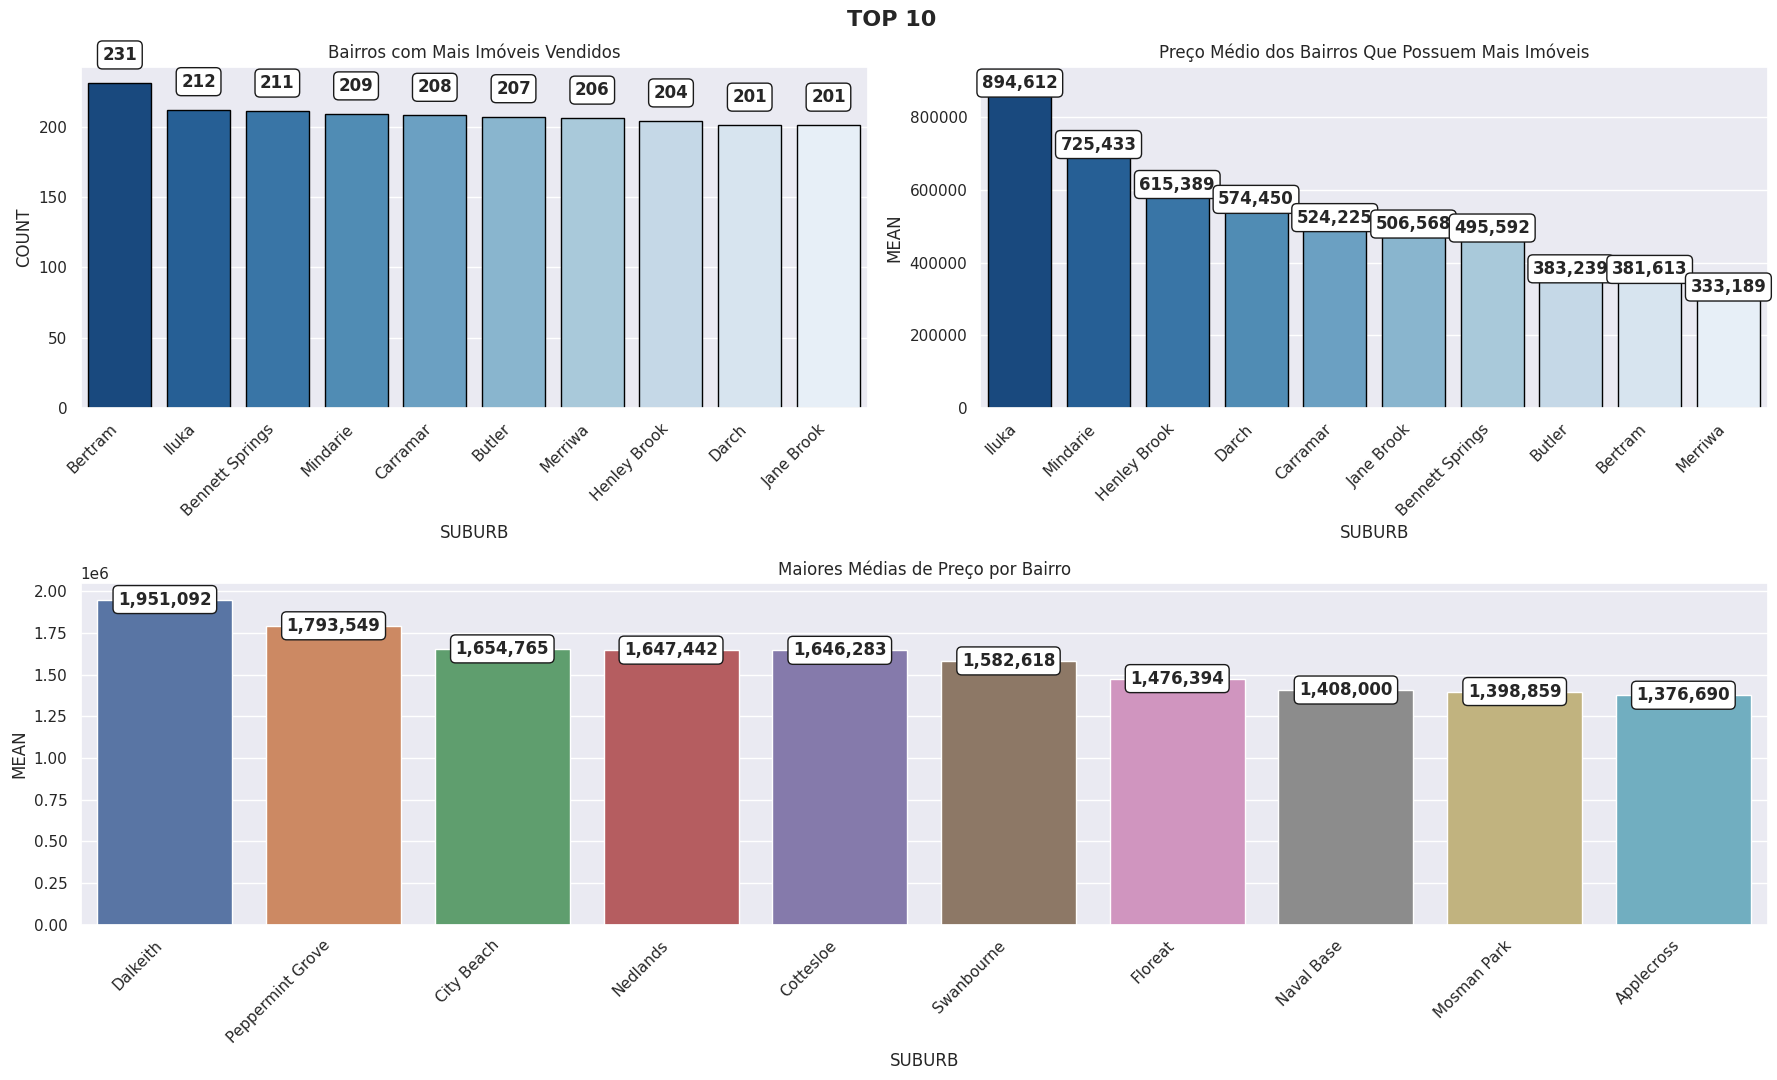

In [ ]:

plt.figure(figsize=(18,11))

# Primeiro Gráfico
plt.subplot(2,2,1)
TOP10_suburban = dados.groupby("SUBURB")["SUBURB"].count().sort_values(ascending=False).head(10)
TOP10_suburban.index
TOP10_suburban.values
x = pd.DataFrame(TOP10_suburban.values, index = TOP10_suburban.index, columns = ["COUNT"])


ax=sns.barplot(data = x, x=x.index, y=x.COUNT,linewidth=1.0, edgecolor='black', palette='Blues_r')
plt.xticks(rotation=45, ha = "right")
plt.title("Bairros com Mais Imóveis Vendidos");


for p in ax.patches:
    value = f"{p.get_height():,.0f}"
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 20
    ax.text(x, y, value, fontsize=12, ha='center', va='center', weight='bold',
           bbox=dict(facecolor='white', boxstyle='round', linewidth=1, edgecolor='k'))
plt.suptitle(t = "TOP 10", fontsize = 16, weight = 'bold') ;



# Segundo Gráfico
plt.subplot(2,2,2)
tt = dados.loc[dados['SUBURB'].isin(TOP10_suburban.index),:]
tt_meam = tt.groupby('SUBURB')['PRICE'].mean().sort_values(ascending=False)
y = pd.DataFrame(tt_meam.values, index = tt_meam.index, columns = ["MEAN"])


ax2=sns.barplot(data = y, x=y.index, y=y.MEAN,linewidth=1.0, edgecolor='black', palette='Blues_r')
plt.xticks(rotation=45, ha = "right")
plt.title("Preço Médio dos Bairros Que Possuem Mais Imóveis");


for p in ax2.patches:
    value = f"{p.get_height():,.0f}"
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 20
    ax2.text(x, y, value, fontsize=12, ha='center', va='center', weight='bold',
           bbox=dict(facecolor='white', boxstyle='round', linewidth=1, edgecolor='k'));


# Terceiro Gráfico
plt.subplot(2,2,(3,4))
TOP10_MeanPrices = dados.groupby("SUBURB")["PRICE"].mean().sort_values(ascending=False).head(10)
TOP10_MeanPrices.index
TOP10_MeanPrices.values
k = pd.DataFrame(TOP10_MeanPrices.values, index = TOP10_MeanPrices.index, columns = ["MEAN"])


ax3 = sns.barplot(data = k, x=k.index, y=k.MEAN, linewidth=1.0)
plt.xticks(rotation=45, ha = "right")
plt.title("Maiores Médias de Preço por Bairro")

for p in ax3.patches:
    value = f"{p.get_height():,.0f}"
    x = p.get_x() + p.get_width()/2
    y = p.get_height() + 20
    ax3.text(x, y, value, fontsize=12, ha='center', va='center', weight='bold',
           bbox=dict(facecolor='white', boxstyle='round', linewidth=1, edgecolor='k')) ;

plt.tight_layout()

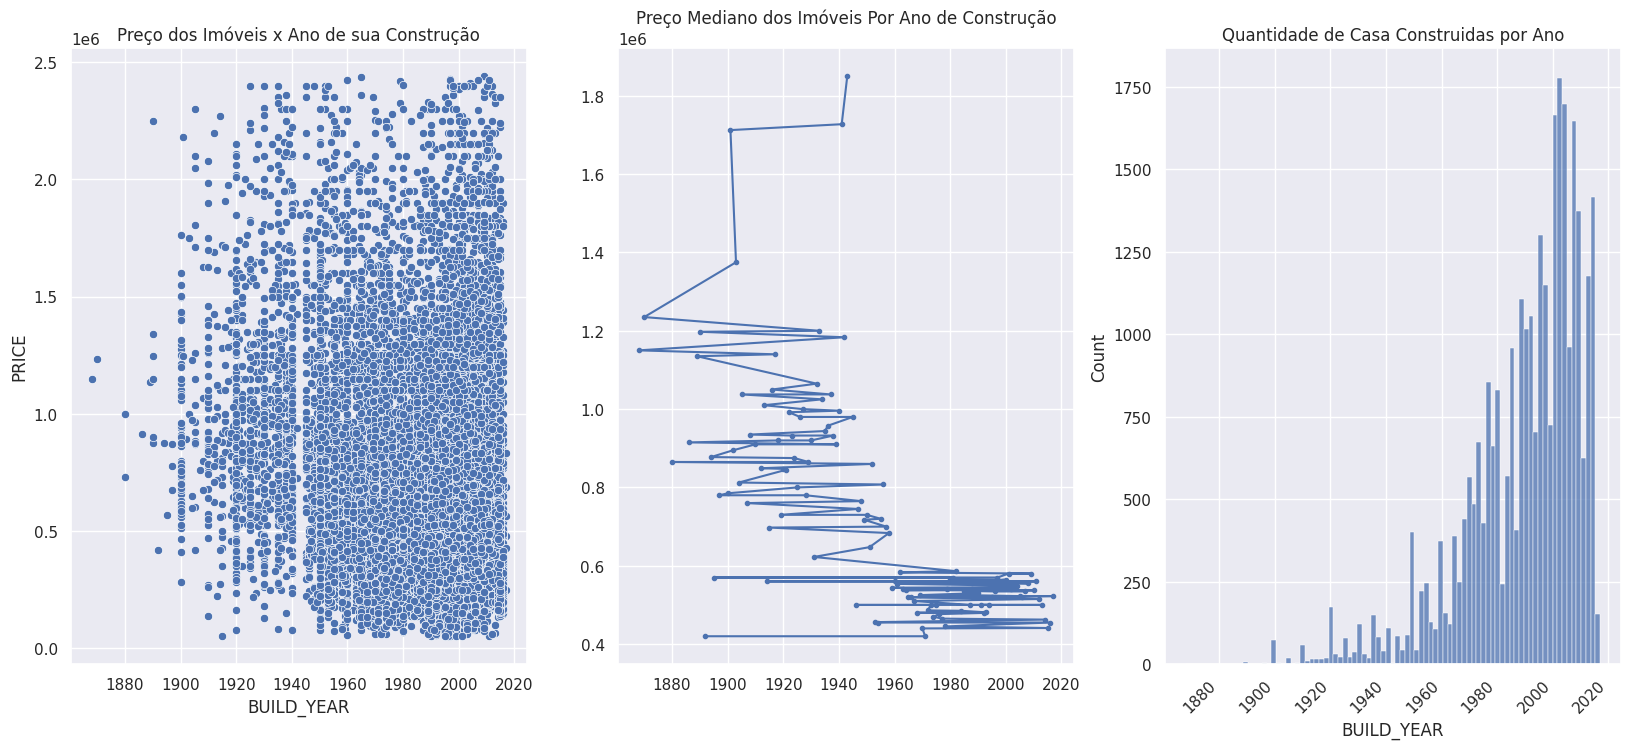

In [ ]:
#t_b_y = dados[dados['PRICE']>1000000].groupby("BUILD_YEAR")['PRICE'].mean().sort_values(ascending=False)
plt.figure(figsize=(20,8))
plt.subplot(1,3,1)
sns.scatterplot(x= dados.BUILD_YEAR,y=dados.PRICE,data=dados);
plt.title("Preço dos Imóveis x Ano de sua Construção")

plt.subplot(1,3,2)
t_b_y = dados.groupby("BUILD_YEAR")['PRICE'].median().sort_values(ascending=False)
# type(t_b_y) retorna uma series
plt.title("Preço Mediano dos Imóveis Por Ano de Construção")
plt.plot( t_b_y.index, t_b_y.values,marker = 'o', ms = 3, );

plt.subplot(1,3,3)
plt.title("Quantidade de Casa Construidas por Ano")
sns.histplot(data=dados, x=dados['BUILD_YEAR']);
plt.xticks(rotation=45, ha = "right");

Analisando o segundo gráfico é possivel notar as casas mais antigas possuem a mediana dos preços maior que as das casas mais novas.

In [ ]:
dados['DATE_SOLD'].replace('\r','',regex=True, inplace = True)
dados['DATE_SOLD'] = pd.to_datetime(dados['DATE_SOLD'], format='%m-%Y')

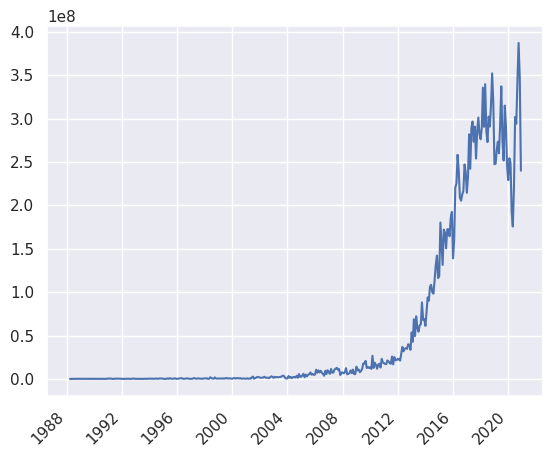

In [ ]:
data_valor = dados.groupby('DATE_SOLD')['PRICE'].sum()
plt.plot(data_valor.index, data_valor.values)
plt.xticks(rotation=45, ha = "right");

A partir do ano de 2012 Houve um "boom" no faturamento de venda de casas em Perth

# Removendo Outlier e valores Nulos

In [ ]:
dados["GARAGE"].fillna(0, inplace = True)

In [ ]:
index_remove = dados[dados['LAND_AREA']>800000].index
dados.drop(index_remove, axis=0, inplace=True )

In [ ]:
index_remove_Garage =dados[dados["GARAGE"]>20].index
dados.drop(index_remove_Garage, axis=0, inplace = True)

In [ ]:
index_nearest = dados[dados.NEAREST_SCH_RANK.isnull()].index
index_nearest

Int64Index([    0,     3,     4,     5,     6,     7,     8,    10,    12,
               14,
            ...
            33596, 33597, 33602, 33610, 33624, 33629, 33630, 33642, 33647,
            33654],
           dtype='int64', length=10950)

In [ ]:
dados.drop(index_nearest, axis = 0, inplace = True)
dados.reset_index(inplace=True, drop=True)

In [ ]:
index_BUILD_YEAR = dados[dados.BUILD_YEAR.isnull()].index
dados.drop(index_BUILD_YEAR, axis = 0, inplace = True)
dados.reset_index(inplace=True, drop=True)

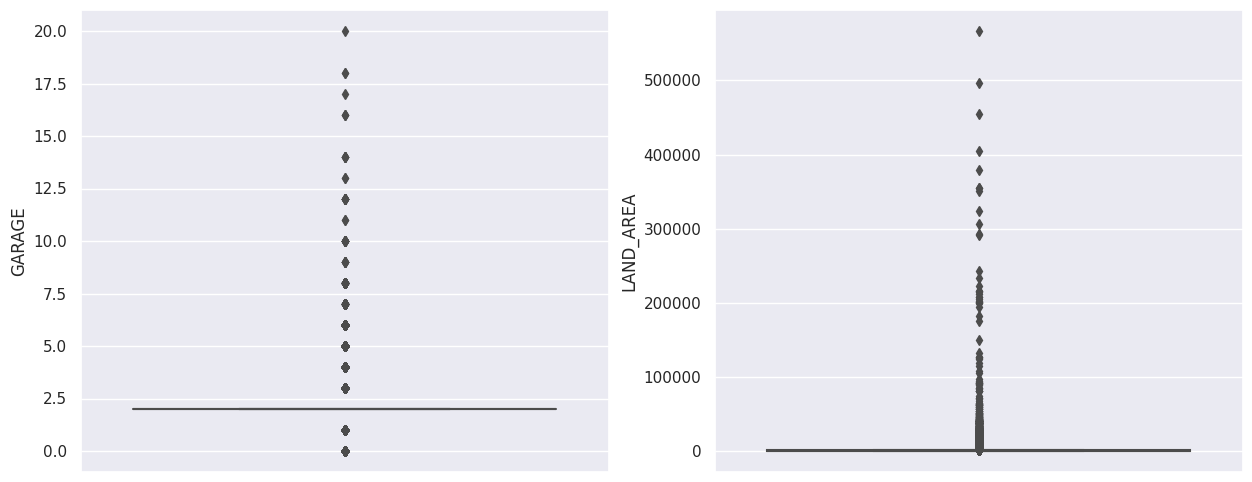

In [ ]:

# Boxplot da coluna GARAGE e LAND_AREA. Aqui  podemos trocar depois para a bibliota plotly.express, acredito q fica mais interessante
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=dados.GARAGE)
plt.subplot(1,2,2)
sns.boxplot(y=dados.LAND_AREA)
plt.tight_layout;

In [ ]:
dados.head()

ADDRESS        SUBURB   PRICE  BEDROOMS  BATHROOMS  GARAGE  \
0           1 Addis Way         Wandi  365000         3          2     2.0   
1       1 Ainsley Court       Camillo  287000         3          1     1.0   
2      1 Arundel Street     Bayswater  685000         3          2     8.0   
3        1 Ashcott Gate        Butler  367500         3          2     2.0   
4  1 Ashendon Boulevard  Hammond Park  535000         4          2     4.0   

   LAND_AREA  FLOOR_AREA  BUILD_YEAR  CBD_DIST               NEAREST_STN  \
0        351         139      2013.0     26900           Kwinana Station   
1        719          86      1979.0     22600           Challis Station   
2        552         126      1999.0      5900         Bayswater Station   
3        398         158      2003.0     36300            Butler Station   
4        704         247      2002.0     23100  Cockburn Central Station   

   NEAREST_STN_DIST  DATE_SOLD  POSTCODE   LATITUDE   LONGITUDE  \
0              4900 2019-02-01      6167 -32.193470  115.859554   
1              1900 2015-06-01      6111 -32.120578  115.993579   
2               508 2019-10-01      6053 -31.917880  115.907050   
3              2100 2018-11-01      6036 -31.654280  115.702200   
4              3900 2019-07-01      6164 -32.159590  115.849480   

                    NEAREST_SCH  NEAREST_SCH_DIST  NEAREST_SCH_RANK  
0                ATWELL COLLEGE          5.524324             129.0  
1  KELMSCOTT SENIOR HIGH SCHOOL          1.649178             113.0  
2     CHISHOLM CATHOLIC COLLEGE          0.936243              29.0  
3                BUTLER COLLEGE          0.680843              39.0  
4                ATWELL COLLEGE          2.220643             129.0

# Removendo Colunas

In [ ]:
dados.drop(["ADDRESS", "POSTCODE",  "DATE_SOLD", "NEAREST_STN", "NEAREST_SCH"], axis=1, inplace=True)


In [ ]:
dados = dados.reindex(columns = ["SUBURB",	"BEDROOMS",	"BATHROOMS",	"GARAGE",	"LAND_AREA",	"FLOOR_AREA", "CBD_DIST",	"NEAREST_STN_DIST",	"LONGITUDE", "LATITUDE","BUILD_YEAR","NEAREST_SCH_RANK","PRICE"])


In [ ]:
dados.head()

SUBURB  BEDROOMS  BATHROOMS  GARAGE  LAND_AREA  FLOOR_AREA  CBD_DIST  \
0         Wandi         3          2     2.0        351         139     26900   
1       Camillo         3          1     1.0        719          86     22600   
2     Bayswater         3          2     8.0        552         126      5900   
3        Butler         3          2     2.0        398         158     36300   
4  Hammond Park         4          2     4.0        704         247     23100   

   NEAREST_STN_DIST   LONGITUDE   LATITUDE  BUILD_YEAR  NEAREST_SCH_RANK  \
0              4900  115.859554 -32.193470      2013.0             129.0   
1              1900  115.993579 -32.120578      1979.0             113.0   
2               508  115.907050 -31.917880      1999.0              29.0   
3              2100  115.702200 -31.654280      2003.0              39.0   
4              3900  115.849480 -32.159590      2002.0             129.0   

    PRICE  
0  365000  
1  287000  
2  685000  
3  367500  
4  535000

In [ ]:
dados.shape

(20683, 13)

In [ ]:
dados.isnull().sum()

SUBURB              0
BEDROOMS            0
BATHROOMS           0
GARAGE              0
LAND_AREA           0
FLOOR_AREA          0
CBD_DIST            0
NEAREST_STN_DIST    0
LONGITUDE           0
LATITUDE            0
BUILD_YEAR          0
NEAREST_SCH_RANK    0
PRICE               0
dtype: int64

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20683 entries, 0 to 20682
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SUBURB            20683 non-null  object 
 1   BEDROOMS          20683 non-null  int64  
 2   BATHROOMS         20683 non-null  int64  
 3   GARAGE            20683 non-null  float64
 4   LAND_AREA         20683 non-null  int64  
 5   FLOOR_AREA        20683 non-null  int64  
 6   CBD_DIST          20683 non-null  int64  
 7   NEAREST_STN_DIST  20683 non-null  int64  
 8   LONGITUDE         20683 non-null  float64
 9   LATITUDE          20683 non-null  float64
 10  BUILD_YEAR        20683 non-null  float64
 11  NEAREST_SCH_RANK  20683 non-null  float64
 12  PRICE             20683 non-null  int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 2.1+ MB


# LabelEncoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
previsores2 = dados.iloc[:, 0:13].values

In [ ]:
previsores2[:, 0] = LabelEncoder().fit_transform(previsores2[:, 0] )


In [ ]:
previsores2

array([[253, 3, 2, ..., 2013.0, 129.0, 365000],
       [44, 3, 1, ..., 1979.0, 113.0, 287000],
       [21, 3, 2, ..., 1999.0, 29.0, 685000],
       ...,
       [170, 4, 2, ..., 2014.0, 53.0, 467000],
       [232, 3, 2, ..., 1997.0, 128.0, 955000],
       [232, 4, 3, ..., 2013.0, 49.0, 1040000]], dtype=object)

# Padronização

In [ ]:
x = previsores2[:, 0:12]
y2 = previsores2[:, 12]

In [ ]:
x

array([[253, 3, 2, ..., -32.19347028, 2013.0, 129.0],
       [44, 3, 1, ..., -32.12057813, 1979.0, 113.0],
       [21, 3, 2, ..., -31.91788, 1999.0, 29.0],
       ...,
       [170, 4, 2, ..., -31.87219187, 2014.0, 53.0],
       [232, 3, 2, ..., -32.06641, 1997.0, 128.0],
       [232, 4, 3, ..., -32.06458, 2013.0, 49.0]], dtype=object)

In [ ]:
y2 = y2.astype(np.float)

In [ ]:
y2

array([ 365000.,  287000.,  685000., ...,  467000.,  955000., 1040000.])

In [ ]:
from sklearn.preprocessing import StandardScaler
X_esc2 = StandardScaler().fit_transform(x)

In [ ]:
X_esc2, X_esc2.dtype

(array([[ 1.54015557, -0.86771749,  0.26578301, ..., -1.45080949,
          1.09854999,  1.39346968],
        [-1.13829022, -0.86771749, -1.41634367, ..., -1.01693954,
         -0.43610636,  0.99998025],
        [-1.43304741, -0.86771749,  0.26578301, ...,  0.18956389,
          0.46663267, -1.06583926],
        ...,
        [ 0.47646658,  0.448431  ,  0.26578301, ...,  0.4615096 ,
          1.14368694, -0.47560512],
        [ 1.27102944, -0.86771749,  0.26578301, ..., -0.69451902,
          0.37635877,  1.36887659],
        [ 1.27102944,  0.448431  ,  1.94790969, ..., -0.68362647,
          1.09854999, -0.57397748]]),
 dtype('float64'))

# Previsor 1

## Separação dos dados em Treino e Teste

In [ ]:
from sklearn.model_selection import train_test_split

X_treino2, X_teste2, y_treino2, y_teste2 = train_test_split(X_esc2, y2, test_size=0.2, random_state=0)

X_treino2.shape, y_treino2.shape, X_teste2.shape, y_teste2.shape

((16546, 12), (16546,), (4137, 12), (4137,))

In [ ]:
X_treino2

array([[-0.83071749, -0.86771749, -1.41634367, ...,  0.95716191,
        -0.57151721,  0.72945626],
       [-1.17673681, -0.86771749,  0.26578301, ...,  1.85245851,
         0.96313914, -0.81990837],
       [ 0.42520446, -2.18386598, -1.41634367, ..., -1.66752808,
        -1.6096671 ,  1.61480748],
       ...,
       [ 0.22015597, -0.86771749, -1.41634367, ..., -0.5259115 ,
        -0.30069551,  0.31137374],
       [ 0.69433059,  0.448431  ,  0.26578301, ..., -0.20030638,
        -2.42213223, -1.70525959],
       [-0.12586334,  0.448431  ,  0.26578301, ...,  1.29398893,
         1.09854999, -0.30345349]])

##Modelos

###Random Forest

####Cross_Val_Score.

>max_depth -> Profundidade da arvore

>min_samples_leaf -> Quantos exemplos eu quero no nó final

>min_samples_split -> Representa o número mínimo de amostras necessárias para dividir um nó interno. Se o número de amostras em um nó for menor que min_samples_split, o nó não será dividido e se tornará um nó folha. Aumentar esse valor pode evitar o superajuste, forçando mais amostras a serem necessárias para uma divisão.

>max_samples -> controlar a porcentagem (se for um valor entre 0 e 1) ou o número máximo de amostras a serem consideradas para cada árvore. Por exemplo, se definir "max_samples" como 0.8, cada árvore será treinada com uma amostra aleatória de 80% das amostras disponíveis no conjunto de treinamento. Essa amostragem aleatória é feita com reposição, o que significa que algumas amostras podem aparecer em múltiplas árvores e outras podem não ser incluídas.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

In [ ]:
modelo_prev1_rf = RandomForestRegressor(random_state=10)

In [ ]:
modelo_prev1_rf.fit(X_treino2, y_treino2)
y_pred2 = modelo_prev1_rf.predict(X_teste2)

In [ ]:
resultado_RF_r2_prev1=[]
resultado_RF_MAE_prev1=[]
resultado_RF_MSE_prev1=[]
resultado_RF_MAPE_prev1=[]

In [ ]:
for i in range(5):
  particoes = KFold(n_splits=5, shuffle=True, random_state=i)

  scores = cross_val_score(modelo_prev1_rf, X_esc2, y2, cv = particoes, scoring = 'r2', verbose=1)
  resultado_RF_r2_prev1.append(scores.mean())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.2min finished


In [ ]:
resultado_RF_r2_prev1

[0.8194303402783918,
 0.8177507305229401,
 0.8176039922738649,
 0.8188854775915017,
 0.8167368330823865]

In [ ]:
for i in range(5):
  particoes = KFold(n_splits=5, shuffle=True, random_state=i)

  mae = cross_val_score(modelo_prev1_rf, X_esc2, y2 , cv = particoes, scoring = 'neg_mean_absolute_error', verbose=1)
  resultado_RF_MAE_prev1.append(mae.mean())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.2min finished


In [ ]:
resultado_RF_MAE_prev1

[-100098.53988955723,
 -100248.16790264408,
 -100266.13398304484,
 -99832.93294582031,
 -100583.72001753903]

In [ ]:
for i in range(5):
  particoes = KFold(n_splits=5, shuffle=True, random_state=i)

  mse = cross_val_score(modelo_prev1_rf, X_esc2, y2 , cv = particoes, scoring = 'neg_mean_squared_error', verbose=1)
  resultado_RF_MSE_prev1.append(mse.mean())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.2min finished


In [ ]:
resultado_RF_MSE_prev1

[-27300462717.41004,
 -27571359001.20393,
 -27599962782.618763,
 -27414605534.68609,
 -27717194303.5273]

In [ ]:
for i in range(5):
  particoes = KFold(n_splits=5, shuffle=True, random_state=i)

  mape = cross_val_score(modelo_prev1_rf, X_esc2, y2 , cv = particoes, scoring = 'neg_mean_absolute_percentage_error', verbose=1)
  resultado_RF_MAPE_prev1.append(mape.mean())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.2min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.2min finished


In [ ]:
resultado_RF_MAPE_prev1

[-0.17697165549713775,
 -0.1778846547422365,
 -0.17733791492968082,
 -0.1767789743949862,
 -0.17833065116406038]

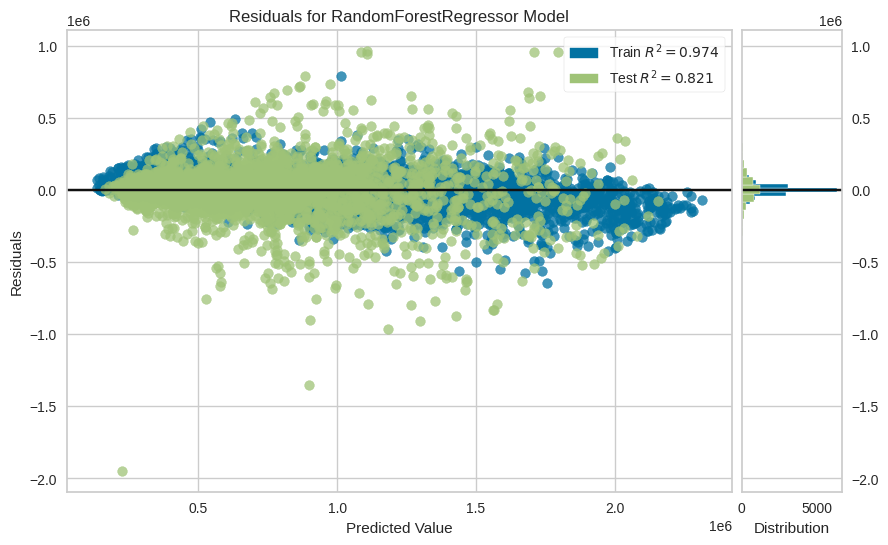

In [ ]:
from yellowbrick.regressor import ResidualsPlot
fig, ax = plt.subplots(figsize=(10, 6))
rpv = ResidualsPlot(modelo_prev1_rf)
rpv.fit(X_treino2, y_treino2)
rpv.score(X_teste2, y_teste2)
rpv.poof();

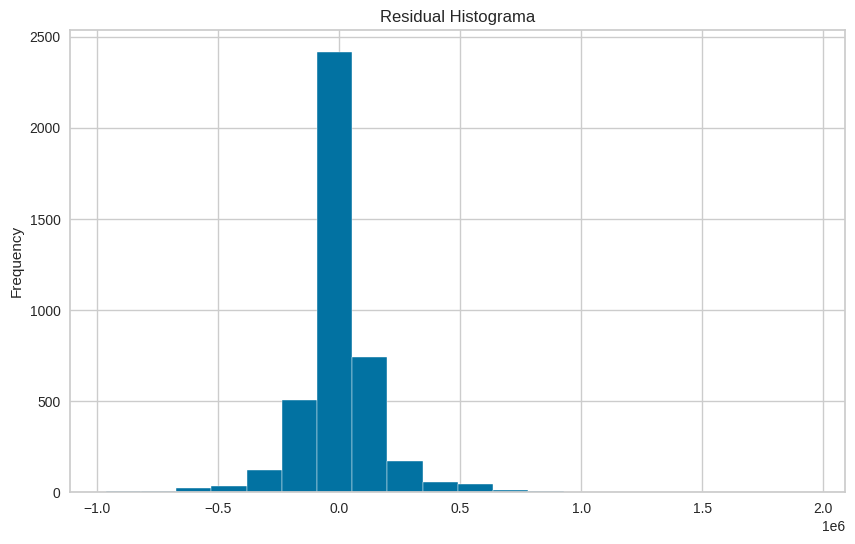

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
resids = y_teste2 - y_pred2
pd.Series(resids, name="residuals").plot.hist(bins=20, ax=ax, title="Residual Histograma");

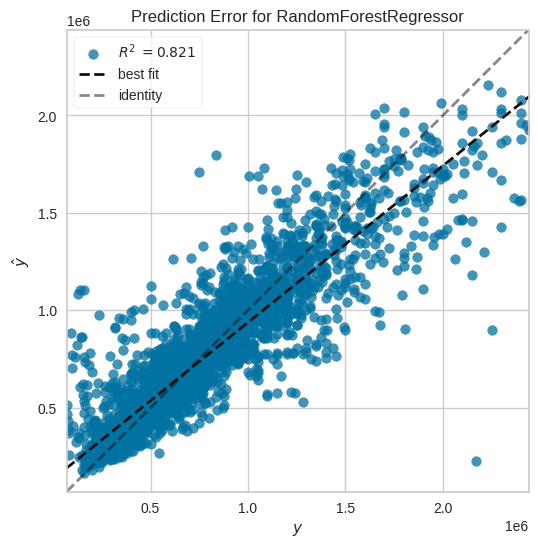

In [ ]:
from yellowbrick.regressor import PredictionError
fig, ax = plt.subplots(figsize=(15, 6))
pev = PredictionError(modelo_prev1_rf)
pev.fit(X_treino2, y_treino2)
pev.score(X_teste2, y_teste2)
pev.poof();

In [ ]:
MAE_prev1_rf = np.mean(resultado_RF_MAE_prev1)
MSE_prev1_rf = np.mean(resultado_RF_MSE_prev1)
MAPE_prev1_rf = np.mean(resultado_RF_MAPE_prev1)
r_2_prev1_rf = np.mean(resultado_RF_r2_prev1)

In [ ]:
t = np.array([MAE_prev1_rf ,MSE_prev1_rf,MAPE_prev1_rf,r_2_prev1_rf])
t.shape = (1,4)

dtf_prev1_rf = pd.DataFrame(t, index=['Valores'], columns=['MAE','RMSE', 'MAPE','R^2'])
round(dtf_prev1_rf ,3)

MAE          RMSE   MAPE    R^2
Valores -100205.899 -2.752072e+10 -0.177  0.818

###XGBOOST

####Cross_Val_Score

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

In [ ]:
modelo_prev1_xg = XGBRegressor(random_state=10)

In [ ]:
modelo_prev1_xg.fit(X_treino2, y_treino2)
y_pred2 = modelo_prev1_xg.predict(X_teste2)

In [ ]:
resultado_XG_r2_prev1=[]

In [ ]:
resultado_XG_MAE_prev1=[]

In [ ]:
resultado_XG_MSE_prev1=[]

In [ ]:
resultado_XG_MAPE_prev1=[]

In [ ]:
for i in range(5):
  particoes = KFold(n_splits=5, shuffle=True, random_state=i)

  scores = cross_val_score(modelo_prev1_xg, X_esc2, y2, cv = particoes, scoring = 'r2', verbose=1)
  resultado_XG_r2_prev1.append(scores.mean())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   12.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   12.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   12.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   12.0s finished


In [ ]:
resultado_XG_r2_prev1

[0.8172888647701138,
 0.8132592203860559,
 0.8181443592701646,
 0.8135272356958382,
 0.8133952737662918]

In [ ]:
for i in range(5):
  particoes = KFold(n_splits=5, shuffle=True, random_state=i)

  mae = cross_val_score(modelo_prev1_xg, X_esc2, y2 , cv = particoes, scoring = 'neg_mean_absolute_error', verbose=1)
  resultado_XG_MAE_prev1.append(mae.mean())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   12.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   12.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   12.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.9s finished


In [ ]:
resultado_XG_MAE_prev1

[-102293.56399542849,
 -102733.74441713061,
 -102443.08288445938,
 -102683.83466672419,
 -103297.41861938867]

In [ ]:
for i in range(5):
  particoes = KFold(n_splits=5, shuffle=True, random_state=i)

  mse = cross_val_score(modelo_prev1_xg, X_esc2, y2 , cv = particoes, scoring = 'neg_mean_squared_error', verbose=1)
  resultado_XG_MSE_prev1.append(mse.mean())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   12.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   12.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   12.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   12.0s finished


In [ ]:
resultado_XG_MSE_prev1

[-27624653279.150196,
 -28252827812.801636,
 -27521113150.25699,
 -28234877450.751534,
 -28217635799.768105]

In [ ]:
for i in range(5):
  particoes = KFold(n_splits=5, shuffle=True, random_state=i)

  mape = cross_val_score(modelo_prev1_xg, X_esc2, y2 , cv = particoes, scoring = 'neg_mean_absolute_percentage_error', verbose=1)
  resultado_XG_MAPE_prev1.append(mape.mean())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   12.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   10.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   11.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   12.0s finished


In [ ]:
resultado_XG_MAPE_prev1

[-0.17849033839639517,
 -0.18092683471556906,
 -0.17963354911578588,
 -0.17932039238528613,
 -0.18071711983954097]

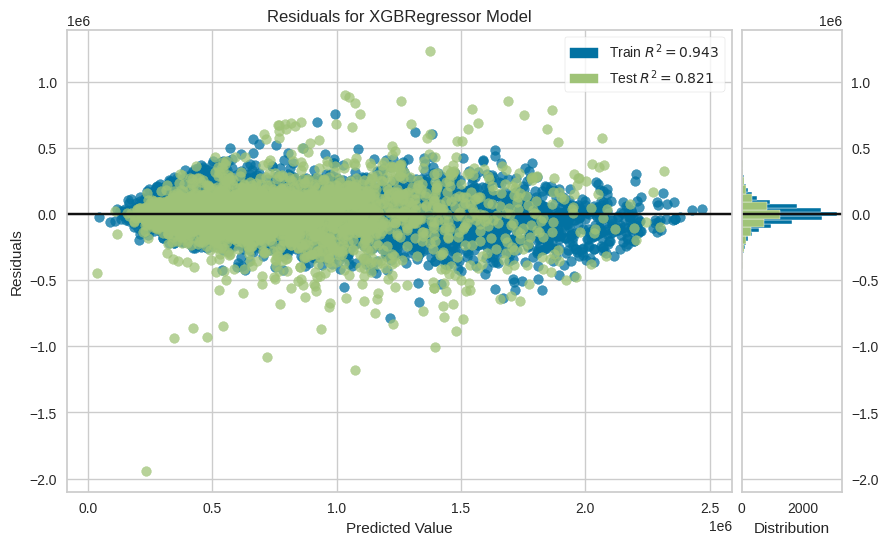

In [ ]:
from yellowbrick.regressor import ResidualsPlot
fig, ax = plt.subplots(figsize=(10, 6))
rpv = ResidualsPlot(modelo_prev1_xg)
rpv.fit(X_treino2, y_treino2)
rpv.score(X_teste2, y_teste2)
rpv.poof();

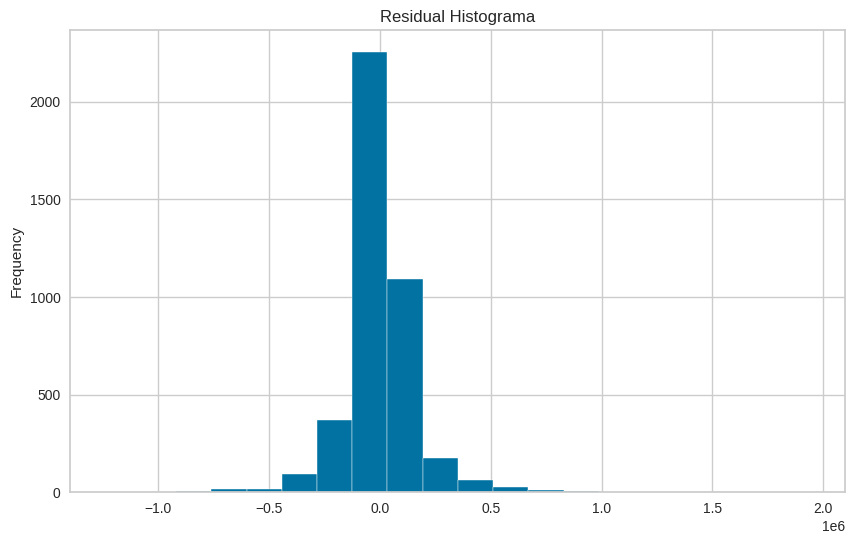

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
resids = y_teste2 - y_pred2
pd.Series(resids, name="residuals").plot.hist(bins=20, ax=ax, title="Residual Histograma");

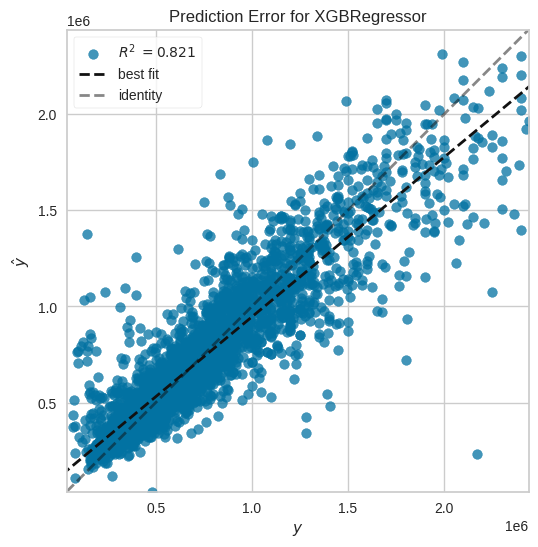

In [ ]:
from yellowbrick.regressor import PredictionError
fig, ax = plt.subplots(figsize=(15, 6))
pev = PredictionError(modelo_prev1_xg)
pev.fit(X_treino2, y_treino2)
pev.score(X_teste2, y_teste2)
pev.poof();

In [ ]:
MAE_prev1_xg = np.mean(resultado_XG_MAE_prev1)
MSE_prev1_xg = np.mean(resultado_XG_MSE_prev1)
MAPE_prev1_xg = np.mean(resultado_XG_MAPE_prev1)
r_2_prev1_xg = np.mean(resultado_XG_r2_prev1)

In [ ]:
d = np.array([MAE_prev1_xg,MSE_prev1_xg,MAPE_prev1_xg,r_2_prev1_xg])
d.shape = (1,4)

dtf_prev1_xg = pd.DataFrame(d, index=['Valores'], columns=['MAE','RMSE', 'MAPE','R^2'])
round(dtf_prev1_xg,3)

MAE          RMSE  MAPE    R^2
Valores -102690.329 -2.797022e+10 -0.18  0.815

# Selecionado as Melhores Features

##SelectKBEST


In [ ]:
from sklearn.feature_selection import SelectKBest
# from sklearn.metrics import accuracy_score , f1_score, precision_score, recall_score # são métricas para classificação
from sklearn.feature_selection import f_regression
features_list = ['SUBURB', 'BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA', 'FLOOR_AREA','CBD_DIST', 'NEAREST_STN_DIST', 'LONGITUDE', 'LATITUDE', 'BUILD_YEAR','NEAREST_SCH_RANK']

In [ ]:
k_best_features = SelectKBest(score_func=f_regression, k="all")
k_best_features.fit_transform(X_esc2, y2)
k_best_features.scores = k_best_features.scores_
raw_pairs = zip(features_list[0:], k_best_features.scores)
ordered_pairs = list(reversed(sorted(raw_pairs, key=lambda x: x[1])))

In [ ]:
k_best_features_final =dict(ordered_pairs[:15])
best_features = k_best_features_final.keys()
print('')
print("Melhores features:")
print(k_best_features_final)


Melhores features:
{'FLOOR_AREA': 9039.142671593481, 'NEAREST_SCH_RANK': 5774.5802118045185, 'CBD_DIST': 3859.5965979668545, 'BATHROOMS': 3642.881786081741, 'BEDROOMS': 1373.877120476723, 'LONGITUDE': 1125.4140395272518, 'BUILD_YEAR': 711.1713314753465, 'NEAREST_STN_DIST': 432.0202010646289, 'GARAGE': 396.45935966657197, 'SUBURB': 70.85830170695809, 'LATITUDE': 60.39014789711191, 'LAND_AREA': 48.581916831512636}


##SelectFdr

In [ ]:
from sklearn.feature_selection import SelectFdr, f_regression

In [ ]:
# alpha: probabilidade de rejeitar a hipotese nula
selecao = SelectFdr(f_regression, alpha=0.00)


In [ ]:
x_novo = selecao.fit_transform( X_esc2, y2)
x_novo.shape, X_esc2.shape

((20683, 4), (20683, 12))

In [ ]:
# retornando o  valor de p-value de cada coluna
selecao.pvalues_

array([4.08479947e-017, 3.19382050e-291, 0.00000000e+000, 2.14091956e-087,
       3.26309512e-012, 0.00000000e+000, 0.00000000e+000, 5.52198721e-095,
       2.65691255e-240, 8.14188717e-015, 4.46343936e-154, 0.00000000e+000])

In [ ]:
colunas = selecao.get_support()
colunas

array([False, False,  True, False, False,  True,  True, False, False,
       False, False,  True])

In [ ]:
dados.columns

Index(['SUBURB', 'BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA', 'FLOOR_AREA',
       'CBD_DIST', 'NEAREST_STN_DIST', 'LONGITUDE', 'LATITUDE', 'BUILD_YEAR',
       'NEAREST_SCH_RANK', 'PRICE'],
      dtype='object')

## SHAP

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 15.1 MB/s eta 0:00:00


In [ ]:
import shap
shap.initjs()

In [ ]:
model = RandomForestRegressor(random_state=10).fit(X_treino2, y_treino2)

In [ ]:
shap_values = shap.TreeExplainer(model).shap_values( X_teste2)


In [ ]:
X_treino2.shape, X_teste2.shape

((16546, 12), (4137, 12))

In [ ]:
dados.iloc[:, 0:12].columns

Index(['SUBURB', 'BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA', 'FLOOR_AREA',
       'CBD_DIST', 'NEAREST_STN_DIST', 'LONGITUDE', 'LATITUDE', 'BUILD_YEAR',
       'NEAREST_SCH_RANK'],
      dtype='object')

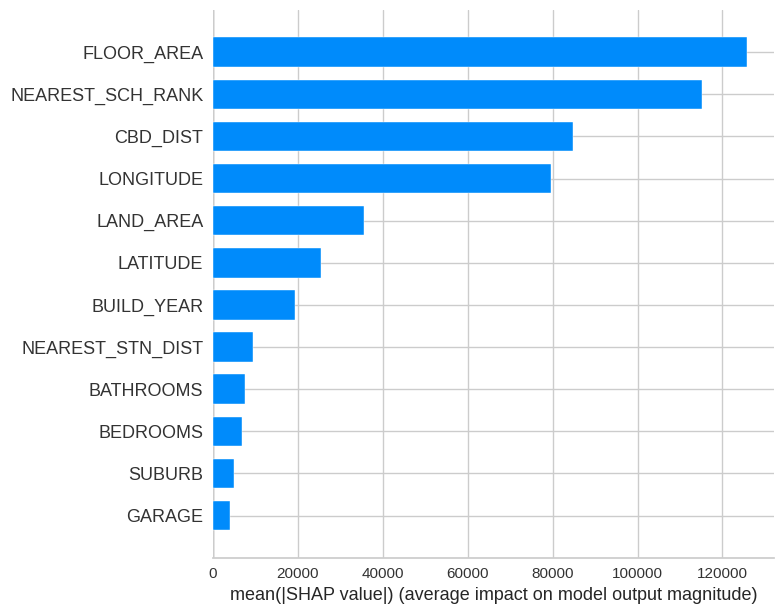

In [ ]:
shap.summary_plot(shap_values,  X_teste2, plot_type="bar", feature_names =['SUBURB', 'BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA', 'FLOOR_AREA','CBD_DIST', 'NEAREST_STN_DIST', 'LONGITUDE', 'LATITUDE', 'BUILD_YEAR','NEAREST_SCH_RANK'])

# Tuning 

## Tratando os Dados

In [ ]:
df = dados.copy()

In [ ]:
df.head()

SUBURB  BEDROOMS  BATHROOMS  GARAGE  LAND_AREA  FLOOR_AREA  CBD_DIST  \
0         Wandi         3          2     2.0        351         139     26900   
1       Camillo         3          1     1.0        719          86     22600   
2     Bayswater         3          2     8.0        552         126      5900   
3        Butler         3          2     2.0        398         158     36300   
4  Hammond Park         4          2     4.0        704         247     23100   

   NEAREST_STN_DIST   LONGITUDE   LATITUDE  BUILD_YEAR  NEAREST_SCH_RANK  \
0              4900  115.859554 -32.193470      2013.0             129.0   
1              1900  115.993579 -32.120578      1979.0             113.0   
2               508  115.907050 -31.917880      1999.0              29.0   
3              2100  115.702200 -31.654280      2003.0              39.0   
4              3900  115.849480 -32.159590      2002.0             129.0   

    PRICE  
0  365000  
1  287000  
2  685000  
3  367500  
4  535000

### Removendo Features

In [ ]:
df.drop(['SUBURB', 'BEDROOMS', 'BATHROOMS', 'GARAGE','NEAREST_STN_DIST'], axis=1, inplace = True)

In [ ]:
df.head()

LAND_AREA  FLOOR_AREA  CBD_DIST   LONGITUDE   LATITUDE  BUILD_YEAR  \
0        351         139     26900  115.859554 -32.193470      2013.0   
1        719          86     22600  115.993579 -32.120578      1979.0   
2        552         126      5900  115.907050 -31.917880      1999.0   
3        398         158     36300  115.702200 -31.654280      2003.0   
4        704         247     23100  115.849480 -32.159590      2002.0   

   NEAREST_SCH_RANK   PRICE  
0             129.0  365000  
1             113.0  287000  
2              29.0  685000  
3              39.0  367500  
4             129.0  535000

### Padronização

In [ ]:
x_pad = df.iloc[:, 0:7].values
y_pad = df.iloc[:, 7].values

In [ ]:
from sklearn.preprocessing import StandardScaler
X_esc2_pad = StandardScaler().fit_transform(x_pad)

In [ ]:
X_esc2_pad.dtype

dtype('float64')

In [ ]:
y_pad.dtype

dtype('int64')

In [ ]:
y_pad = y_pad.astype(np.float)

In [ ]:
y_pad.dtype

dtype('float64')

### Separadando dados

In [ ]:
from sklearn.model_selection import train_test_split

X_treino2_prev2, X_teste2_prev2, y_treino2_prev2, y_teste2_prev2 = train_test_split(X_esc2_pad, y_pad, test_size=0.2, random_state=0)

X_treino2_prev2.shape, y_treino2_prev2.shape, X_teste2_prev2.shape, y_teste2_prev2.shape

((16546, 7), (16546,), (4137, 7), (4137,))

## Random Forest

###Random Search - Busca Aleatória

In [ ]:
! pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 5.8 MB/s eta 0:00:00


In [ ]:
from skopt import dummy_minimize
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
kfold=KFold(5, shuffle=True, random_state=10)

In [ ]:
# func : recebe uma função. que é a função que queromos otimizar
# dimensions : recebe um alista de dimensões. Ou seja, quais os limites dos intervalos dos parâmetros qua a gente quer otimizar
# n_calls : quantidade de amostras que queremos que o modelo teste. Ex: n_calls=50, o modelo vai testar 50 cominações de valores de hiper parametros e retoranar a que obtiver melhor resultado.
?dummy_minimize

In [ ]:
def treinar_modelo(params):

  n_estimators= params[0]
  criterion= params[1]
  max_features= params[2]
  min_samples_leaf= params[3]
  min_samples_split= params[4]

  print(params)

  mo = RandomForestRegressor( n_estimators = n_estimators, criterion = criterion ,
                         max_features = max_features,  min_samples_leaf =  min_samples_leaf, 
                         min_samples_split = min_samples_split,  random_state=10)
  

  return -np.mean(cross_val_score(mo, X_treino2_prev2, y_treino2_prev2, cv=kfold, n_jobs=-1))     


In [ ]:
space =[(100, 1000), # n_estimators
        ['poisson', 'squared_error', 'friedman_mse'], # criterion
        ["auto", "sqrt", "log2"], # max_features
        (2,10), # min_samples_leaf
        (2,15)] # min_samples_split

In [ ]:
res = dummy_minimize(treinar_modelo, space, random_state=10, verbose=1,n_calls=20)

Iteration No: 1 started. Evaluating function at random point.
[225, 'poisson', 'sqrt', 2, 15]
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 55.8390
Function value obtained: -0.8071
Current minimum: -0.8071
Iteration No: 2 started. Evaluating function at random point.
[981, 'friedman_mse', 'auto', 10, 8]
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 237.5940
Function value obtained: -0.7943
Current minimum: -0.8071
Iteration No: 3 started. Evaluating function at random point.
[520, 'friedman_mse', 'log2', 8, 10]
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 44.4174
Function value obtained: -0.7991
Current minimum: -0.8071
Iteration No: 4 started. Evaluating function at random point.
[463, 'poisson', 'auto', 6, 3]
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 137.3109
Function value obtained: -0.8012
Current minimum: -0.8071
Iteration No: 5 started. Evaluating function at random point.
[791, 'squared_

In [ ]:
res.x

[757, 'poisson', 'sqrt', 3, 6]

###Bayesian Optimization - Otimização Bayesiana


In [ ]:
from skopt import gp_minimize

In [ ]:
gp_resultados = gp_minimize(treinar_modelo,space,random_state=10,verbose=1,n_calls=20, n_random_starts=10)

Iteration No: 1 started. Evaluating function at random point.
[369, 'poisson', 'log2', 9, 10]
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 39.9851
Function value obtained: -0.7976
Current minimum: -0.7976
Iteration No: 2 started. Evaluating function at random point.
[123, 'poisson', 'log2', 4, 4]
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 14.9502
Function value obtained: -0.8080
Current minimum: -0.8080
Iteration No: 3 started. Evaluating function at random point.
[715, 'squared_error', 'log2', 9, 5]
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 59.7755
Function value obtained: -0.7972
Current minimum: -0.8080
Iteration No: 4 started. Evaluating function at random point.
[128, 'squared_error', 'log2', 6, 4]
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 12.0872
Function value obtained: -0.8027
Current minimum: -0.8080
Iteration No: 5 started. Evaluating function at random point.
[472, 'squared_er

In [ ]:
gp_resultados.x

[1000, 'friedman_mse', 'sqrt', 2, 2]

##XGboost

###Random Search - Busca Aleatória

In [ ]:
! pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from skopt import dummy_minimize
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
kfold=KFold(5, shuffle=True, random_state=10)

In [ ]:

def treinar_mo(params):

  learning_rate = params[0]
  max_depth = params[1]
  subsample = params[2]
  min_child_weight = params[3]
  num_parallel_tree = params[4]

  print(params)

  mo = XGBRegressor(objective = "reg:squarederror", learning_rate = learning_rate, max_depth = max_depth,
                         subsample = subsample, min_child_weight = min_child_weight, 
                         num_parallel_tree = num_parallel_tree, n_estimators=100, random_state=10)
  
  
  return -np.mean(cross_val_score(mo, X_treino2_prev2, y_treino2_prev2, cv=kfold, n_jobs=-1))     



In [ ]:
space =[(0.01, 0.11), # learning_rate
        (1,30), # max_depth
        (0.5,1), # subsample
        (1,10), # min_child_weight
        (1,15)] # num_parallel_tree 

In [ ]:
res = dummy_minimize(treinar_mo, space, random_state=10, verbose=1,n_calls=20)

Iteration No: 1 started. Evaluating function at random point.
[0.03987611518856283, 16, 0.8168241174631378, 10, 14]
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 287.9899
Function value obtained: -0.8081
Current minimum: -0.8081
Iteration No: 2 started. Evaluating function at random point.
[0.03247966455308477, 18, 0.854604004921506, 10, 1]
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 22.4590
Function value obtained: -0.7994
Current minimum: -0.8081
Iteration No: 3 started. Evaluating function at random point.
[0.03636028460289524, 23, 0.8426799091838987, 1, 5]
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 158.6467
Function value obtained: -0.7949
Current minimum: -0.8081
Iteration No: 4 started. Evaluating function at random point.
[0.010394826632791445, 23, 0.9454082653396614, 2, 9]
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 187.7155
Function value obtained: -0.2578
Current minimum: -0.8081
It

In [ ]:
res.x

[0.07010389534045444, 24, 0.5058940146924822, 9, 10]

###Bayesian Optimization - Otimização Bayesiana

In [ ]:
from skopt import gp_minimize

In [ ]:
gp_resultados = gp_minimize(treinar_mo,space,random_state=10,verbose=1,n_calls=20, n_random_starts=10)

Iteration No: 1 started. Evaluating function at random point.
[0.03987611518856283, 15, 0.7215074738443042, 8, 9]
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 172.0812
Function value obtained: -0.8094
Current minimum: -0.8094
Iteration No: 2 started. Evaluating function at random point.
[0.012517172841774563, 22, 0.6327830633860485, 3, 3]
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 57.3049
Function value obtained: -0.4345
Current minimum: -0.8094
Iteration No: 3 started. Evaluating function at random point.
[0.07838184293612342, 25, 0.6680357922322759, 9, 4]
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 105.3603
Function value obtained: -0.8103
Current minimum: -0.8103
Iteration No: 4 started. Evaluating function at random point.
[0.013061665387269342, 26, 0.8637177568591168, 6, 3]
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 60.0122
Function value obtained: -0.4788
Current minimum: -0.8103
Iter

In [ ]:
gp_resultados.x

[0.0766332145597057, 30, 0.5, 10, 6]

# Previsor 2

## Modelo

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
modelo_prev2_rf = RandomForestRegressor(n_estimators=1000 ,criterion='friedman_mse' ,max_features='sqrt', min_samples_leaf= 2, min_samples_split= 2, random_state=10)

In [ ]:
modelo_prev2_rf.fit(X_treino2_prev2, y_treino2_prev2)

RandomForestRegressor(criterion='friedman_mse', max_features='sqrt',
                      min_samples_leaf=2, n_estimators=1000, random_state=10)

In [ ]:
y_pred2_prev2_rf = modelo_prev2_rf.predict(X_teste2_prev2)

#### Cross Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
resultado_RF_r2=[]
resultado_RF_MAE=[]
resultado_RF_MSE=[]
resultado_RF_MAPE=[]

In [ ]:
for i in range(5):
  particoes = KFold(n_splits=5, shuffle=True, random_state=i)

  scores = cross_val_score(modelo_prev2_rf, X_esc2_pad, y_pad , cv = particoes, scoring = 'r2', verbose=1)
  resultado_RF_r2.append(scores.mean())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.0min finished


In [ ]:
resultado_RF_r2

[0.8172865142165243,
 0.8171404786690367,
 0.8168038805646418,
 0.8177367064487526,
 0.8160302679003448]

In [ ]:
for i in range(5):
  particoes = KFold(n_splits=5, shuffle=True, random_state=i)

  mae = cross_val_score(modelo_prev2_rf, X_esc2_pad, y_pad , cv = particoes, scoring = 'neg_mean_absolute_error', verbose=1)
  resultado_RF_MAE.append(mae.mean())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.9min finished


In [ ]:
resultado_RF_MAE

[-100234.75958342252,
 -100239.23954556292,
 -100153.65850044508,
 -100078.3858102252,
 -100662.2021894435]

In [ ]:
for i in range(5):
  particoes = KFold(n_splits=5, shuffle=True, random_state=i)

  mse = cross_val_score(modelo_prev2_rf, X_esc2_pad, y_pad , cv = particoes, scoring = 'neg_mean_squared_error', verbose=1)
  resultado_RF_MSE.append(mse.mean())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  3.0min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.9min finished


In [ ]:
resultado_RF_MSE

[-27619963530.820976,
 -27669289227.74419,
 -27721156070.89081,
 -27598180795.010475,
 -27834803281.503918]

In [ ]:
for i in range(5):
  particoes = KFold(n_splits=5, shuffle=True, random_state=i)

  mape = cross_val_score(modelo_prev2_rf, X_esc2_pad, y_pad , cv = particoes, scoring = 'neg_mean_absolute_percentage_error', verbose=1)
  resultado_RF_MAPE.append(mape.mean())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.9min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.9min finished


In [ ]:
resultado_RF_MAPE

[-0.17951775165591513,
 -0.18006174703852856,
 -0.17977114387747023,
 -0.179359750352589,
 -0.18026984843335583]

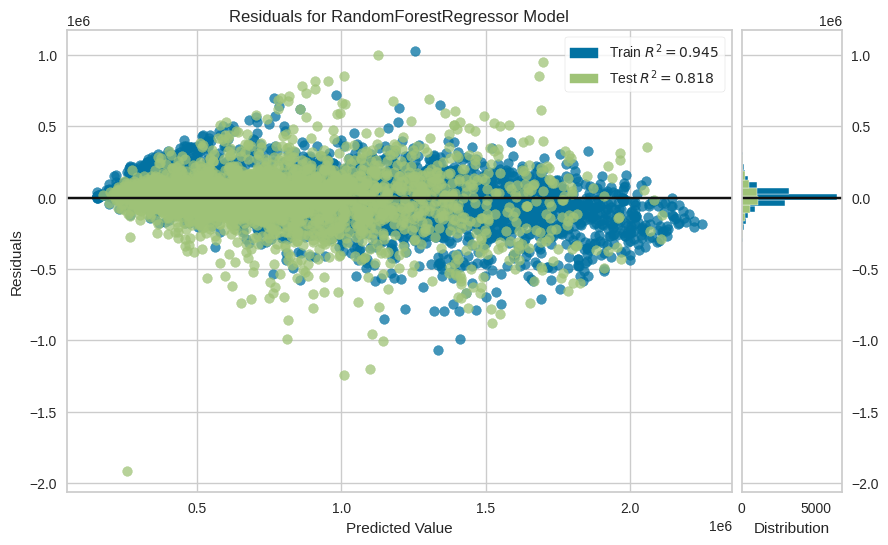

In [ ]:
from yellowbrick.regressor import ResidualsPlot
fig, ax = plt.subplots(figsize=(10, 6))
rpv = ResidualsPlot(modelo_prev2_rf)
rpv.fit(X_treino2_prev2, y_treino2_prev2)
rpv.score(X_teste2_prev2, y_teste2_prev2)
rpv.poof();

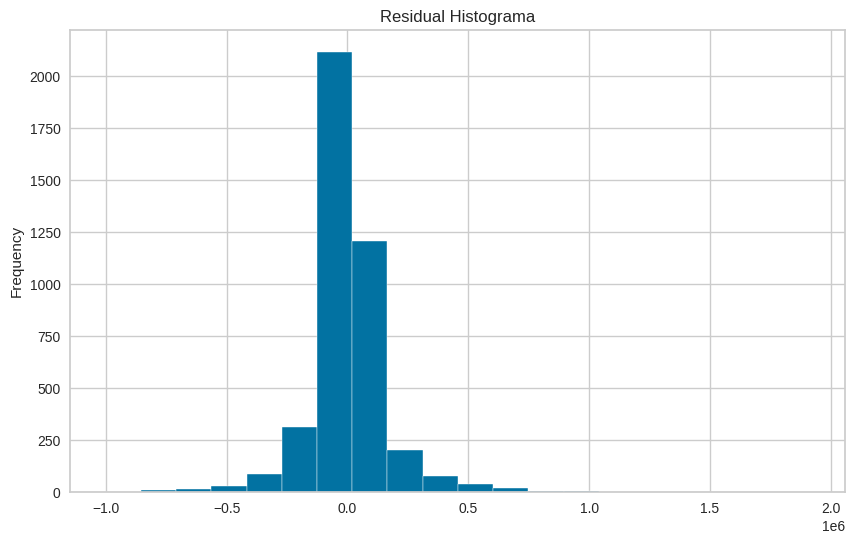

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
resids = y_teste2_prev2 - y_pred2_prev2_rf
pd.Series(resids, name="residuals").plot.hist(bins=20, ax=ax, title="Residual Histograma");

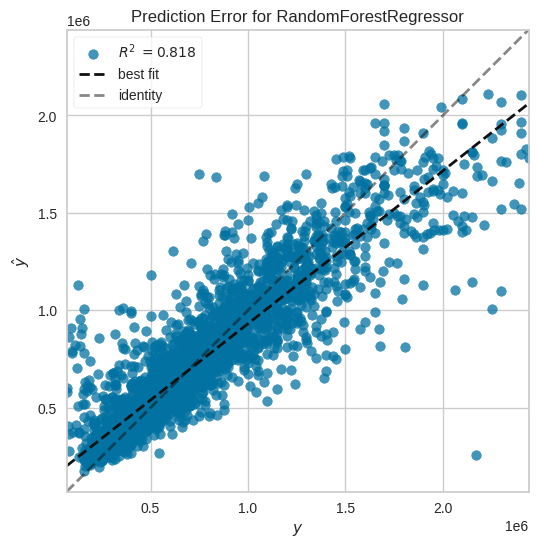

In [ ]:
from yellowbrick.regressor import PredictionError
plt.subplots(figsize=(15, 6))
pev = PredictionError(modelo_prev2_rf)
pev.fit(X_treino2_prev2, y_treino2_prev2)
pev.score(X_teste2_prev2, y_teste2_prev2)
pev.poof();

In [ ]:
MAE_prev2_rf = np.mean(resultado_RF_MAE)
MSE_prev2_rf = np.mean(resultado_RF_MSE)
MAPE_prev2_rf = np.mean(resultado_RF_MAPE)
r_2_prev2_rf = np.mean(resultado_RF_r2)

In [ ]:
w = np.array([MAE_prev2_rf,MSE_prev2_rf,MAPE_prev2_rf,r_2_prev2_rf])
w.shape = (1,4)

dtf_prev2_rf = pd.DataFrame(w, index=['Valores'], columns=['MAE','RMSE', 'MAPE','R^2'])
round(dtf_prev2_rf ,3)

MAE          RMSE  MAPE    R^2
Valores -100273.649 -2.768868e+10 -0.18  0.817

### XGBoost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
modelo_prev2_xg =  XGBRegressor(objective = "reg:squarederror", learning_rate=0.07010389534045444, max_depth=24, subsample=0.5058940146924822 , min_child_weight=9, num_parallel_tree = 10, random_state=10 )

In [ ]:
modelo_prev2_xg.fit(X_treino2_prev2, y_treino2_prev2)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.07010389534045444,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=24, max_leaves=None,
             min_child_weight=9, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=10,
             predictor=None, random_state=10, ...)

In [ ]:
y_pred2_prev2_xg = modelo_prev2_xg.predict(X_teste2_prev2)

#### Cross Validation

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
resultado_XG_r2=[]
resultado_XG_MAE=[]
resultado_XG_MSE=[]
resultado_XG_MAPE=[]

In [ ]:
for i in range(5):
  particoes = KFold(n_splits=5, shuffle=True, random_state=i)

  scores_xg = cross_val_score(modelo_prev2_xg, X_esc2_pad, y_pad , cv = particoes, scoring = 'r2',verbose=1)
  resultado_XG_r2.append(scores_xg.mean())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  5.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  5.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  5.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  5.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  5.4min finished


In [ ]:
resultado_XG_r2

[0.8193105647342425,
 0.8188410582722871,
 0.8184339142623411,
 0.8203859292321958,
 0.8181186384258263]

In [ ]:
for i in range(5):
  particoes = KFold(n_splits=5, shuffle=True, random_state=i)

  mae_xg = cross_val_score(modelo_prev2_xg, X_esc2_pad, y_pad , cv = particoes, scoring = 'neg_mean_absolute_error',verbose=1)
  resultado_XG_MAE.append(mae_xg.mean())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  5.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  5.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  5.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  5.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  5.5min finished


In [ ]:
resultado_XG_MAE

[-99284.81446558272,
 -99252.25332159267,
 -99227.88764453221,
 -98867.60075670369,
 -99549.03909398262]

In [ ]:
for i in range(5):
  particoes = KFold(n_splits=5, shuffle=True, random_state=i)

  mse_xg= cross_val_score(modelo_prev2_xg, X_esc2_pad, y_pad , cv = particoes, scoring = 'neg_mean_squared_error',verbose=1)
  resultado_XG_MSE.append(mse_xg.mean())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  5.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  5.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  5.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  5.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  5.5min finished


In [ ]:
resultado_XG_MSE

[-27316688752.37013,
 -27408816480.424812,
 -27470986690.232384,
 -27192187902.436283,
 -27506736201.54127]

In [ ]:
for i in range(5):
  particoes = KFold(n_splits=5, shuffle=True, random_state=i)

  mape_xg = cross_val_score(modelo_prev2_xg, X_esc2_pad, y_pad , cv = particoes, scoring = 'neg_mean_absolute_percentage_error',verbose=1)
  resultado_XG_MAPE.append(mape_xg.mean())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  5.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  5.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  5.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  5.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  5.4min finished


In [ ]:
resultado_XG_MAPE

[-0.17712852567002782,
 -0.1778949869865824,
 -0.17780721819273407,
 -0.1765325800747138,
 -0.17773069302893893]

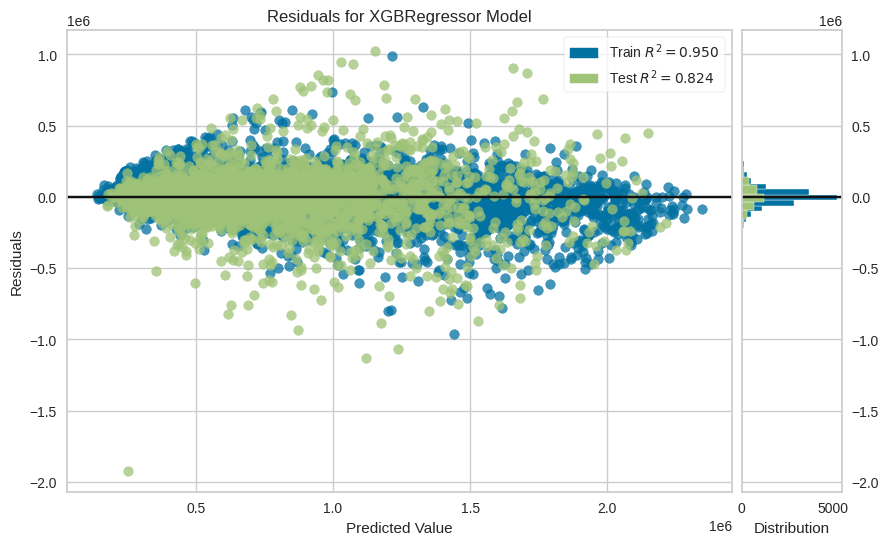

In [ ]:
from yellowbrick.regressor import ResidualsPlot
fig, ax = plt.subplots(figsize=(10, 6))
rpv = ResidualsPlot(modelo_prev2_xg)
rpv.fit(X_treino2_prev2, y_treino2_prev2)
rpv.score(X_teste2_prev2, y_teste2_prev2)
rpv.poof();

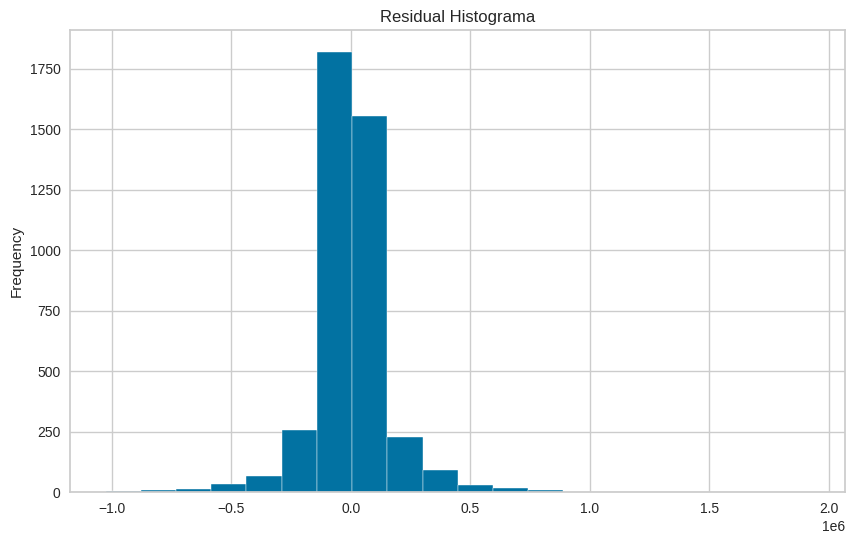

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
resids = y_teste2_prev2 - y_pred2_prev2_xg
pd.Series(resids, name="residuals").plot.hist(bins=20, ax=ax, title="Residual Histograma");

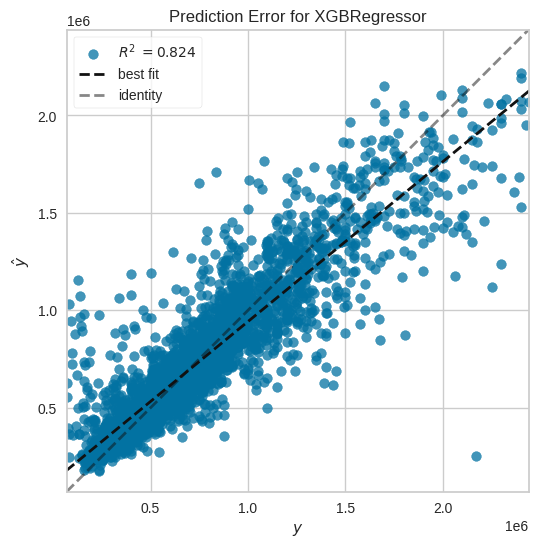

In [ ]:
from yellowbrick.regressor import PredictionError
plt.subplots(figsize=(15, 6))
pev = PredictionError(modelo_prev2_xg)
pev.fit(X_treino2_prev2, y_treino2_prev2)
pev.score(X_teste2_prev2, y_teste2_prev2)
pev.poof();

In [ ]:
MAE_prev2_xg = np.mean(resultado_XG_MAE)
MSE_prev2_xg = np.mean(resultado_XG_MSE)
MAPE_prev2_xg = np.mean(resultado_RF_MAPE)
r_2_prev2_xg = np.mean(resultado_XG_r2)

In [ ]:
w = np.array([MAE_prev2_xg, MSE_prev2_xg, MAPE_prev2_xg, r_2_prev2_xg])
w.shape = (1,4)

dtf_prev2_xg = pd.DataFrame(w, index=['Valores'], columns=['MAE','RMSE', 'MAPE','R^2'])
round(dtf_prev2_xg,3)

MAE          RMSE  MAPE    R^2
Valores -99236.319 -2.737908e+10 -0.18  0.819

# Resultados Finais

In [ ]:
dtf_prev2_xg

MAE          RMSE      MAPE       R^2
Valores -99236.319056 -2.737908e+10 -0.179796  0.819018

In [ ]:
dtf_prev2_rf 

MAE          RMSE      MAPE    R^2
Valores -100273.649126 -2.768868e+10 -0.179796  0.817

In [ ]:
dtf_prev1_xg

MAE          RMSE      MAPE       R^2
Valores -102690.328917 -2.797022e+10 -0.179818  0.815123

In [ ]:
dtf_prev1_rf

MAE          RMSE      MAPE       R^2
Valores -100205.898948 -2.752072e+10 -0.177461  0.818081